<a href="https://colab.research.google.com/github/Christianah001/Hackbio-biocoding-internship/blob/main/Stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task 2.6

!pip install seaborn
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install adjustText

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

In [ ]:
#Load the data

transcriptomics = "https://gist.githubusercontent.com/stephenturner/806e31fce55a8b7175af/raw/1a507c4c3f9f1baaa3a69187223ff3d3050628d4/results.txt" #add data source
df = pd.read_csv(transcriptomics, sep=" ").dropna()

In [ ]:
print(df.head(10))

      Gene  log2FoldChange        pvalue      padj
0     DOK6          0.5100  1.861000e-08  0.000305
1     TBX5         -2.1290  5.655000e-08  0.000419
2  SLC32A1          0.9003  7.664000e-08  0.000419
3   IFITM1         -1.6870  3.735000e-06  0.006809
4    NUP93          0.3659  3.373000e-06  0.006809
5  EMILIN2          1.5340  2.976000e-06  0.006809
6     TPX2         -0.9974  2.097000e-06  0.006809
7    LAMA2         -1.4250  2.390000e-06  0.006809
8     CAV2         -1.0520  3.213000e-06  0.006809
9      TNN         -1.6580  8.973000e-06  0.014720


In [ ]:
#Prepare data for volcano plot

df['nlog10'] = -np.log10(df.padj)

In [ ]:
print(df.head(10))

      Gene  log2FoldChange        pvalue      padj    nlog10
0     DOK6          0.5100  1.861000e-08  0.000305  3.515273
1     TBX5         -2.1290  5.655000e-08  0.000419  3.377682
2  SLC32A1          0.9003  7.664000e-08  0.000419  3.377682
3   IFITM1         -1.6870  3.735000e-06  0.006809  2.166917
4    NUP93          0.3659  3.373000e-06  0.006809  2.166917
5  EMILIN2          1.5340  2.976000e-06  0.006809  2.166917
6     TPX2         -0.9974  2.097000e-06  0.006809  2.166917
7    LAMA2         -1.4250  2.390000e-06  0.006809  2.166917
8     CAV2         -1.0520  3.213000e-06  0.006809  2.166917
9      TNN         -1.6580  8.973000e-06  0.014720  1.832092


<Axes: xlabel='log2FoldChange', ylabel='nlog10'>

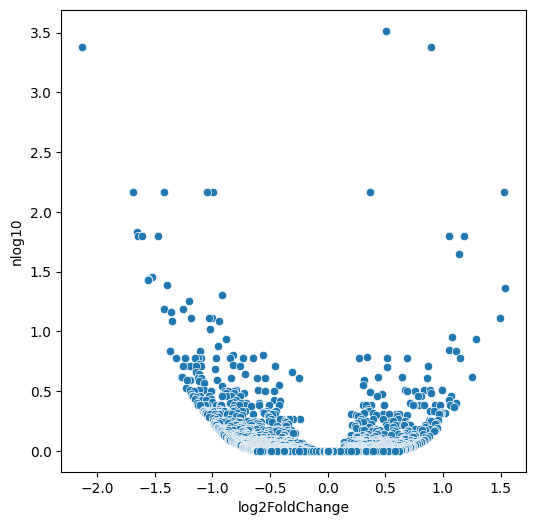

In [ ]:
#Generate the volcano plot
plt.figure(figsize = (6,6))

sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10')

<ipython-input-17-40a0781b3cde>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Significance')


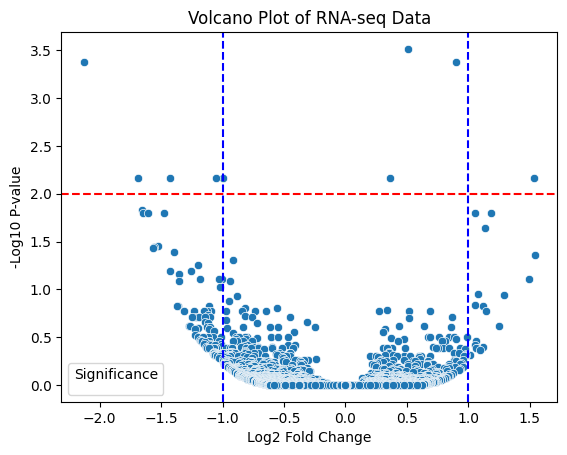

In [ ]:
# Plot settings

sns.scatterplot(data=df, x='log2FoldChange', y='nlog10')
plt.title("Volcano Plot of RNA-seq Data")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.axhline(-np.log10(0.01), color='red', linestyle='--')
plt.axvline(1, color='blue', linestyle='--')
plt.axvline(-1, color='blue', linestyle='--')
plt.legend(title='Significance')
plt.show()

Upregulated Genes:
         Gene  log2FoldChange    pvalue
5     EMILIN2           1.534  0.000003
10     POU3F4           1.181  0.000011
14  LOC285954           1.050  0.000015
15      VEPH1           1.137  0.000022
20      DTHD1           1.540  0.000056

Downregulated Genes:
     Gene  log2FoldChange        pvalue
1    TBX5          -2.129  5.655000e-08
3  IFITM1          -1.687  3.735000e-06
7   LAMA2          -1.425  2.390000e-06
8    CAV2          -1.052  3.213000e-06
9     TNN          -1.658  8.973000e-06


<Axes: xlabel='log2FoldChange', ylabel='nlog10'>

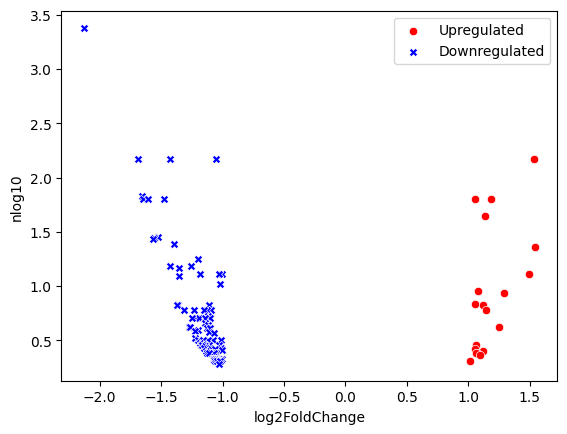

In [ ]:
# Highlight upregulated and downregulated genes

upregulated_genes = df[(df['log2FoldChange'] > 1) & (df['pvalue'] < 0.01)]
downregulated_genes = df[(df['log2FoldChange'] < -1) & (df['pvalue'] < 0.01)]

print("Upregulated Genes:")
print(upregulated_genes[['Gene', 'log2FoldChange', 'pvalue']].head(5))

print("\nDownregulated Genes:")
print(downregulated_genes[['Gene', 'log2FoldChange', 'pvalue']].head(5))

sns.scatterplot(data=upregulated_genes, x='log2FoldChange', y='nlog10', color='red', label='Upregulated', marker='o')
sns.scatterplot(data=downregulated_genes, x='log2FoldChange', y='nlog10', color='blue', label='Downregulated', marker='X')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


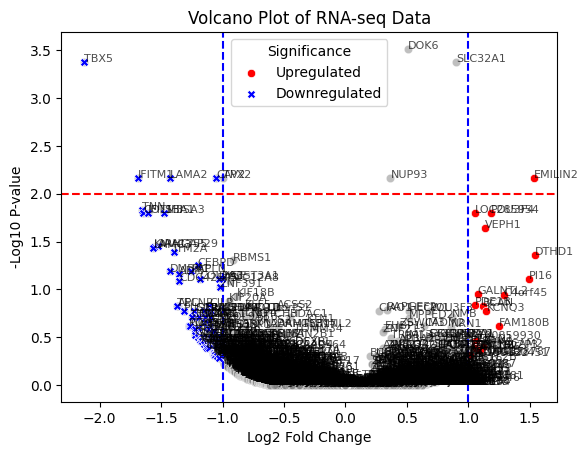

In [ ]:
#Prepare data for volcano plot

df['nlog10'] = -np.log10(df.padj)
sns.scatterplot(data=df, x='log2FoldChange', y='nlog10', color='gray', alpha=0.5)


upregulated_genes = df[(df['log2FoldChange'] > 1) & (df['pvalue'] < 0.01)]
downregulated_genes = df[(df['log2FoldChange'] < -1) & (df['pvalue'] < 0.01)]


sns.scatterplot(data=upregulated_genes, x='log2FoldChange', y='nlog10', color='red', label='Upregulated', marker='o')
sns.scatterplot(data=downregulated_genes, x='log2FoldChange', y='nlog10', color='blue', label='Downregulated', marker='X')

for i in range(df.shape[0]):
    plt.annotate(df['Gene'][i],
                 (df['log2FoldChange'][i], df['nlog10'][i]),
                 fontsize=8, alpha=0.7)

#Annotate all genes
texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 < 0.01 and abs(df.iloc[i].log2FoldChange) > 1:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].symbol,
                             fontsize = 12, weight = 'bold'))

# Plot settings
plt.title("Volcano Plot of RNA-seq Data")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.axhline(-np.log10(0.01), color='red', linestyle='--')
plt.axvline(1, color='blue', linestyle='--')
plt.axvline(-1, color='blue', linestyle='--')
plt.legend(title='Significance')
plt.show()

In [ ]:
#functions of the top 5 upregulated genes and top 5 downregulated genes.

#UPREGULATED GENES
1. EMILIN2: May be responsible for anchoring smooth muscle cells to elastic fibers, and may be involved not only in the formation of the elastic fiber,
    but also in the processes that regulate vessel assembly. Has cell adhesive capacity.
2. POU3F4: Probable transcription factor which exert its primary action widely during early neural development and in a very limited set of neurons
   in the mature brain.
3. LOC285954: The funtion is not in the genecards.
4. VEPH1: nteracts with TGF-beta receptor type-1 (TGFBR1) and inhibits dissociation of activated SMAD2 from TGFBR1, impeding its nuclear accumulation
    and resulting in impaired TGF-beta signaling. May also affect FOXO, Hippo and Wnt signaling.
5. DTHD1: The funtion is not in the genecards.

#DOWNREGULATED GENES
1. TBX5: DNA-binding protein that regulates the transcription of several genes and is involved in heart development and limb pattern formation. Binds
    to the core DNA motif of NPPA promoter.
2. IFITM1: IFN-induced antiviral protein which inhibits the entry of viruses to the host cell cytoplasm, permitting endocytosis, but preventing
    subsequent viral fusion and release of viral contents into the cytosol. Active against multiple viruses, including influenza A virus, SARS
    coronaviruses (SARS-CoV and SARS-CoV-2), Marburg virus (MARV), Ebola virus (EBOV), Dengue virus (DNV), West Nile virus (WNV), human
    immunodeficiency virus type 1 (HIV-1) and hepatitis C virus (HCV).
    Can inhibit: influenza virus hemagglutinin protein-mediated viral entry, MARV and EBOV GP1,2-mediated viral entry and SARS-CoV and
    SARS-CoV-2 S protein-mediated viral entry. Also implicated in cell adhesion and control of cell growth and migration
3. LAMA2: Binding to cells via a high affinity receptor, laminin is thought to mediate the attachment, migration and organization of
    cells into tissues during embryonic development by interacting with other extracellular matrix components.
4. CAV2: May act as a scaffolding protein within caveolar membranes. Interacts directly with G-protein alpha subunits and can functionally regulate
    their activity. Acts as an accessory protein in conjunction with CAV1 in targeting to lipid rafts and driving caveolae formation. The Ser-36
    phosphorylated form has a role in modulating mitosis in endothelial cells. Positive regulator of cellular mitogenesis of the MAPK signaling
    pathway. Required for the insulin-stimulated nuclear translocation and activation of MAPK1 and STAT3, and the subsequent regulation of cell cycle
    progression.
5.  TNN: Extracellular matrix protein that seems to be a ligand for ITGA8:ITGB1, ITGAV:ITGB1 and ITGA4:ITGB1. Involved in neurite outgrowth and cell
    migration in hippocampal explants.During endochondral bone formation, inhibits proliferation and differentiation of proteoblasts mediated by
    canonical WNT signaling. In tumors, stimulates angiogenesis by elongation, migration and sprouting of endothelial cells. Expressed in most mammary
    tumors, may facilitate tumorigenesis by supporting the migratory behavior of breast cancer cells.

In [ ]:
# github profile for team
# Ogunoye Blessing's Github page: https://github.com/to-ibukun
# Obakpolo Charis-Grace Github page: https://github.com/CeeGeeObas
# Funmilayo Ligali's Github page: https://github.com/Christianah001
# Fatemah Alsolaiman's Github page: https://github.com/92Faty

       Protein Amino_Acid  sift_Score
0       A5A607       K60Q    0.197799
1       A5A607       Y56C    0.174970
2       A5A607       Y56S    0.415581
3       A5A630       A16V    0.516738
4       A5A630       A47T    0.387271
...        ...        ...         ...
155462  Q93K97      S190P    0.017680
155463  Q93K97      T124I    0.169846
155464  Q93K97       T23I    0.094208
155465  Q93K97      V145L    1.000000
155466  Q93K97       V49I    0.740893

[155467 rows x 3 columns]
      Protein Amino_Acid  foldX_Score
0      A5A607       E63D     1.842160
1      A5A607       K60Q     0.517100
2      A5A607       Y56C     0.728700
3      A5A607       Y56S     0.842120
4      P00350      A117S    -0.098540
...       ...        ...          ...
76570  Q93K97      S190P    -1.778610
76571  Q93K97      T124I    -0.973832
76572  Q93K97       T23I    -0.242378
76573  Q93K97      V145L    -0.249012
76574  Q93K97       V49I    -0.381140

[76575 rows x 3 columns]
       Protein Amino_Acid  sift_Sco

<ipython-input-3-2ee6d7fa348e>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deleterious_df.loc[:, "Original_Amino_Acid"] = deleterious_df["Amino_Acid_x"].str[0]


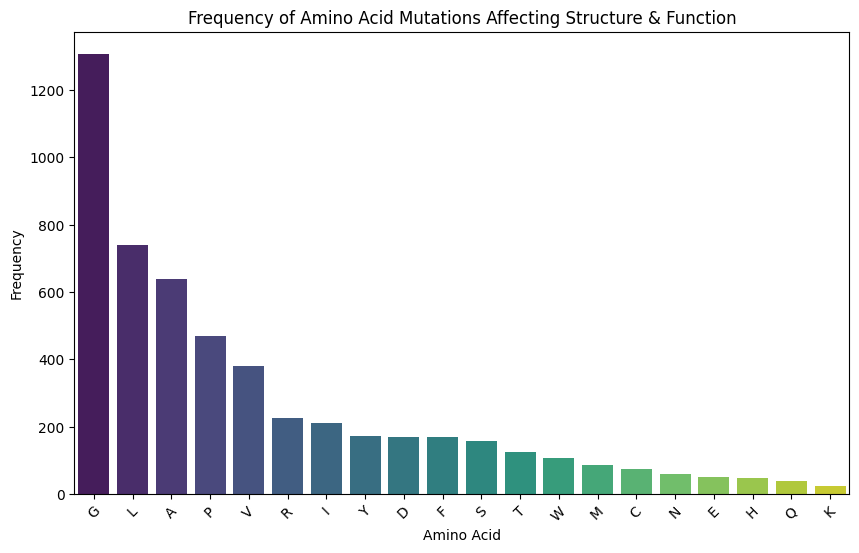

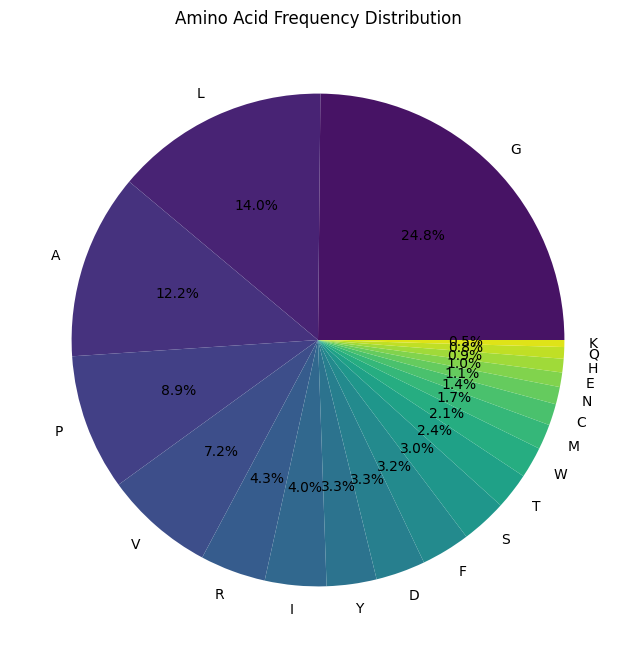

Glycine (G) is the amino acid with the highest impact on protein structure and function. Glycine is unique because it lacks a side chain, making it highly flexible and often found in regions requiring structural adaptability, such as loops and turns. This flexibility is crucial for protein folding and stability. Mutations affecting glycine can have significant consequences because replacing it with a bulkier amino acid may introduce steric hindrance, disrupting local structure and impairing function. Additionally, glycine is frequently found in conserved motifs and enzymatic active sites, meaning its substitution can affect catalytic activity and protein interactions.
   Amino Acid  Frequency
0           G       1307
1           L        739
2           A        640
3           P        470
4           V        380
5           R        227
6           I        212
7           Y        172
8           D        171
9           F        169
10          S        158
11          T        12

In [3]:
#Task 2.4


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load datasets
sift_url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv"
foldx_url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv"

sift_df = pd.read_table(sift_url, sep='\\s+')
foldx_df = pd.read_table(foldx_url, sep='\\s+')

print(sift_df)
print(foldx_df)

sift_df["specific_Protein_aa"] = sift_df["Protein"] + "_" + sift_df["Amino_Acid"]
foldx_df['specific_Protein_aa'] = foldx_df['Protein'] + '_' + foldx_df['Amino_Acid']

print(sift_df)
print(foldx_df)

# Merge datasets on specific_Protein_aa
merged_df = pd.merge(sift_df, foldx_df, on='specific_Protein_aa')

print(merged_df)

# Set criteria for deleterious mutations
deleterious_df = merged_df[(merged_df['sift_Score'] < 0.05) & (merged_df['foldX_Score'] > 2)]

deleterious_df.head()

print(deleterious_df)

# Extract first amino acid
deleterious_df.loc[:, "Original_Amino_Acid"] = deleterious_df["Amino_Acid_x"].str[0]

# Find most impactful amino acid
amino_acid_counts = deleterious_df["Original_Amino_Acid"].value_counts()
most_impactful_aa = amino_acid_counts.idxmax()
most_impactful_count = amino_acid_counts.max()
print(f"The amino acid with the most functional and structural impact is {most_impactful_aa} with {most_impactful_count} occurrences.")

# Frequency table
aa_frequency_table = amino_acid_counts.reset_index()
aa_frequency_table.columns = ["Amino Acid", "Frequency"]

print(aa_frequency_table)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Amino Acid", y="Frequency", hue="Amino Acid", data=aa_frequency_table, palette="viridis", legend=False)
plt.title("Frequency of Amino Acid Mutations Affecting Structure & Function")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(aa_frequency_table["Frequency"], labels=aa_frequency_table["Amino Acid"], autopct="%1.1f%%", colors=sns.color_palette("viridis", len(aa_frequency_table)))
plt.title("Amino Acid Frequency Distribution")
plt.show()

# Brief description of the most impactful amino acid
if most_impactful_aa == "G":
    print("Glycine (G) is the amino acid with the highest impact on protein structure and function. Glycine is unique because it lacks a side chain, making it highly flexible and often found in regions requiring structural adaptability, such as loops and turns. This flexibility is crucial for protein folding and stability. Mutations affecting glycine can have significant consequences because replacing it with a bulkier amino acid may introduce steric hindrance, disrupting local structure and impairing function. Additionally, glycine is frequently found in conserved motifs and enzymatic active sites, meaning its substitution can affect catalytic activity and protein interactions.")


# Amino acids with more than 100 occurrences
high_freq_aa = aa_frequency_table[aa_frequency_table["Frequency"] > 100]
print(high_freq_aa)


# Structural and functional significance of highly occurring amino acids
print("Amino acids with high occurrences (G, L, A, P, V, R, I, Y, D, F, S, T, W) often play crucial roles in protein stability and function. These residues may be involved in conserved structural motifs, active sites, or interaction interfaces. For example:")
print("- Glycine (G) provides flexibility due to its small size.")
print("- Proline (P) introduces kinks in protein structures, affecting folding.")
print("- Arginine (R) and Aspartic acid (D) are charged and often participate in interactions like hydrogen bonding and salt bridges.")
print("- Hydrophobic amino acids like Leucine (L), Valine (V), and Isoleucine (I) contribute to core stability.")
print("Frequent mutations in these amino acids could indicate their essential role in maintaining protein integrity and functionality.")

# github profile for team
# Ogunoye Blessing's Github page: https://github.com/to-ibukun
# Obakpolo Charis-Grace Github page: https://github.com/CeeGeeObas
# Funmilayo Ligali's Github page: https://github.com/Christianah001
# Fatemah Alsolaiman's Github page: https://github.com/92Faty


                 id          Age         Income      Poverty    HomeRooms  \
count   5000.000000  5000.000000    4623.000000  4675.000000  4972.000000   
mean   67027.600800    36.708000   57077.655202     2.761161     6.192679   
std     2830.800124    22.561794   33489.760642     1.692700     2.389182   
min    62163.000000     0.000000    2500.000000     0.000000     1.000000   
25%    64543.500000    17.000000   30000.000000     1.190000     4.000000   
50%    67039.000000    36.000000   50000.000000     2.600000     6.000000   
75%    69509.000000    54.000000  100000.000000     4.760000     8.000000   
max    71915.000000    80.000000  100000.000000     5.000000    13.000000   

            Weight       Height         BMI        Pulse        BPSys  ...  \
count  4969.000000  4841.000000  4834.00000  4282.000000  4281.000000  ...   
mean     70.327692   161.528672    26.44427    73.633816   118.704508  ...   
std      28.800933    20.475889     7.27919    12.140440    17.385414  .

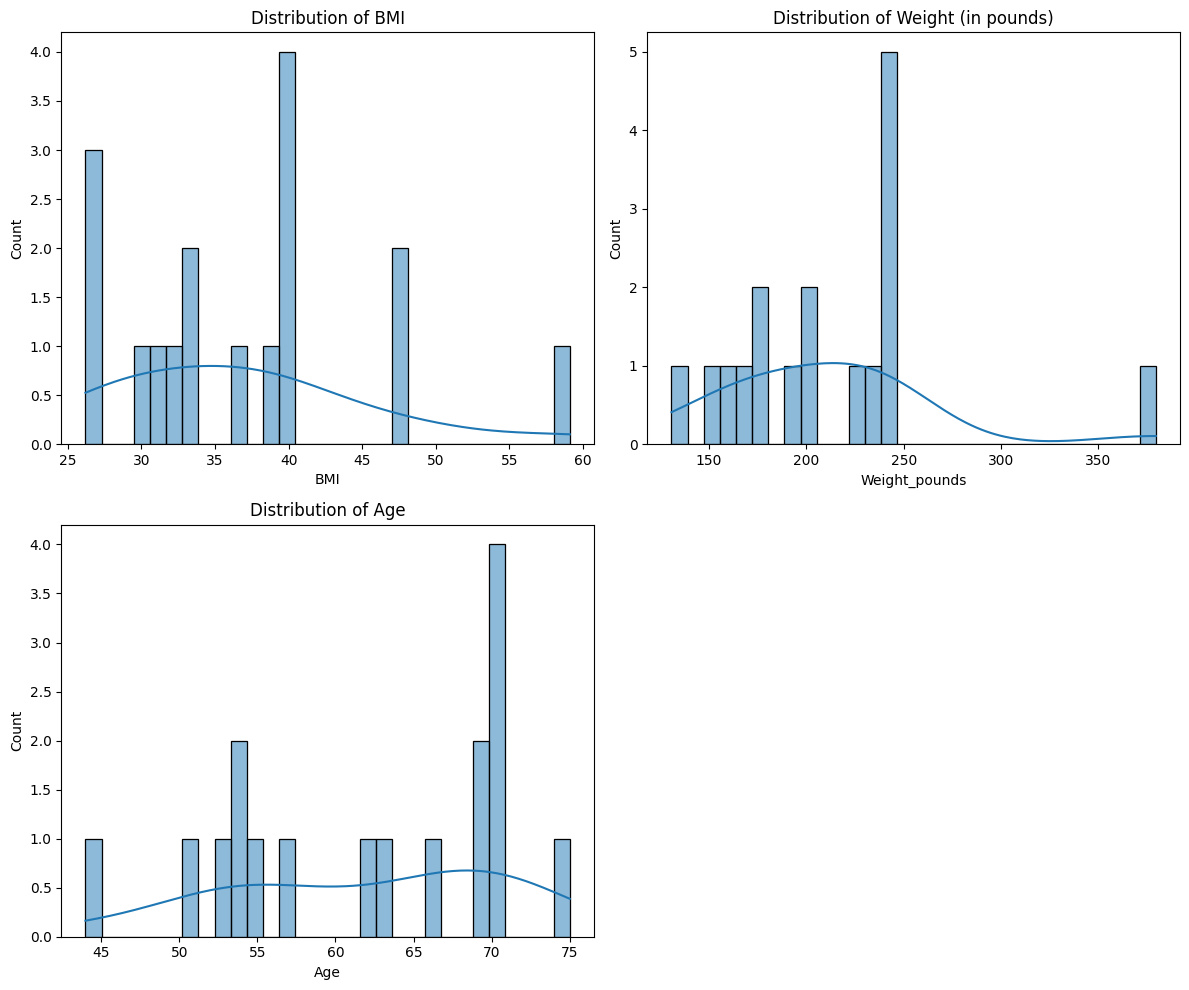

Mean 60-second pulse rate: 74.94118
Range of Diastolic Blood Pressure: 0.0 - 89.0
Variance of Income: 768566176.47
Standard Deviation of Income: 27723.03


<ipython-input-8-2ef0b01e7d01>:67: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Gender'], palette = ['purple', 'grey'])


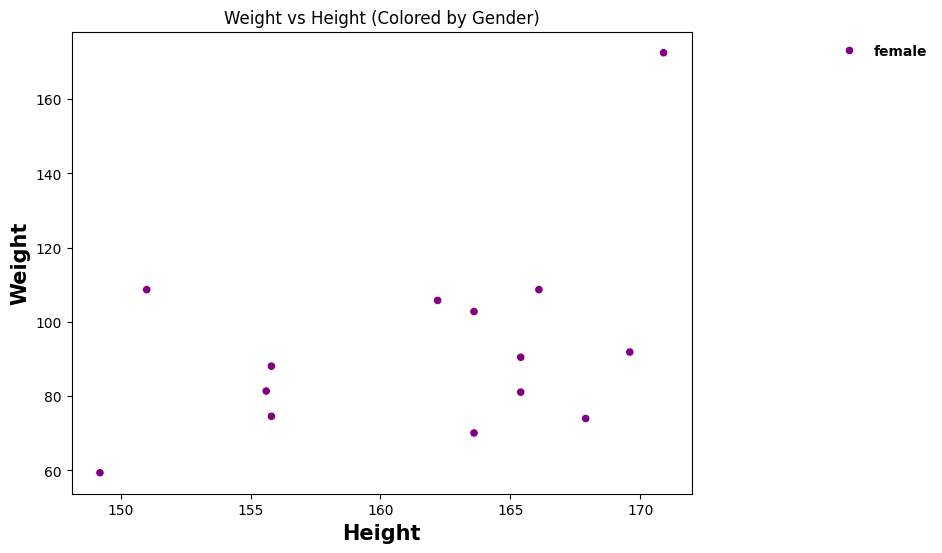

<ipython-input-8-2ef0b01e7d01>:76: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Diabetes'], palette = ['green', 'brown'])


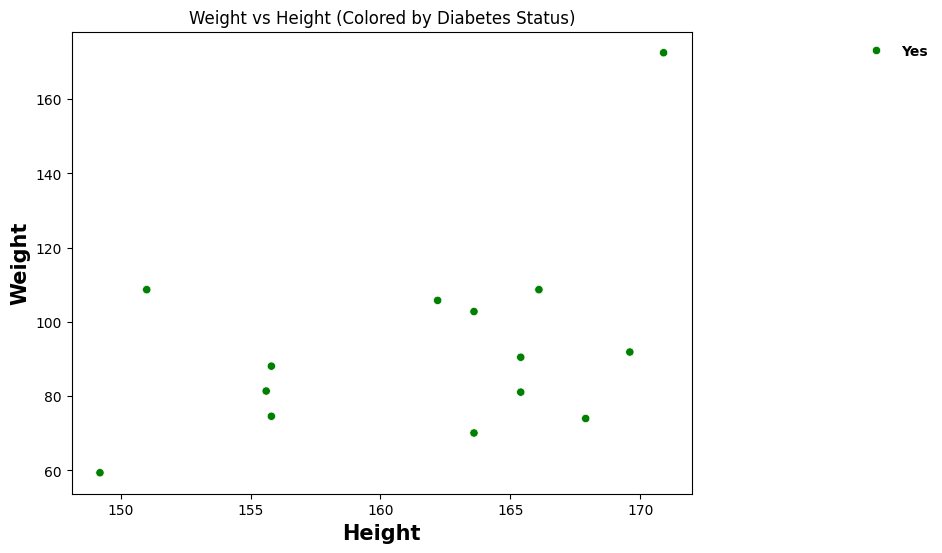

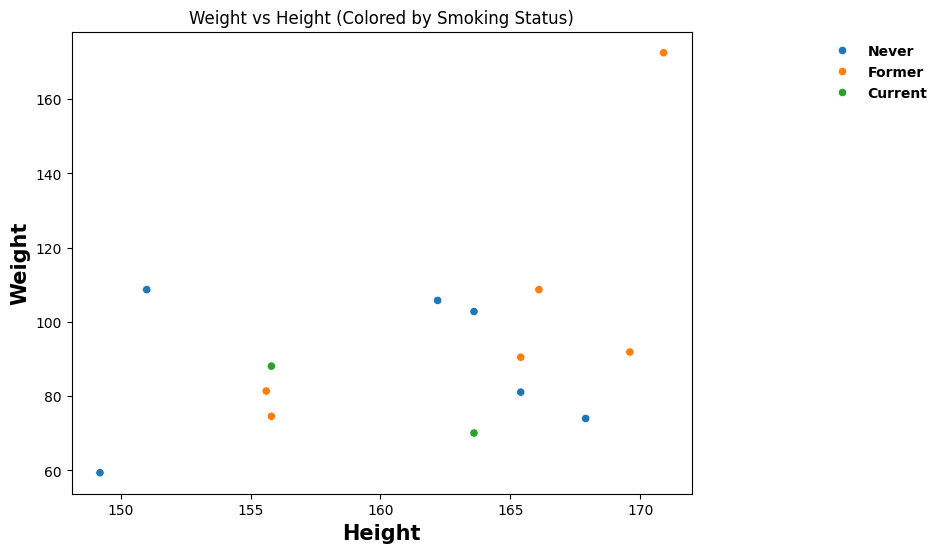

<ipython-input-8-2ef0b01e7d01>:94: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df, x='Height', y='Weight',
<ipython-input-8-2ef0b01e7d01>:94: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df, x='Height', y='Weight',


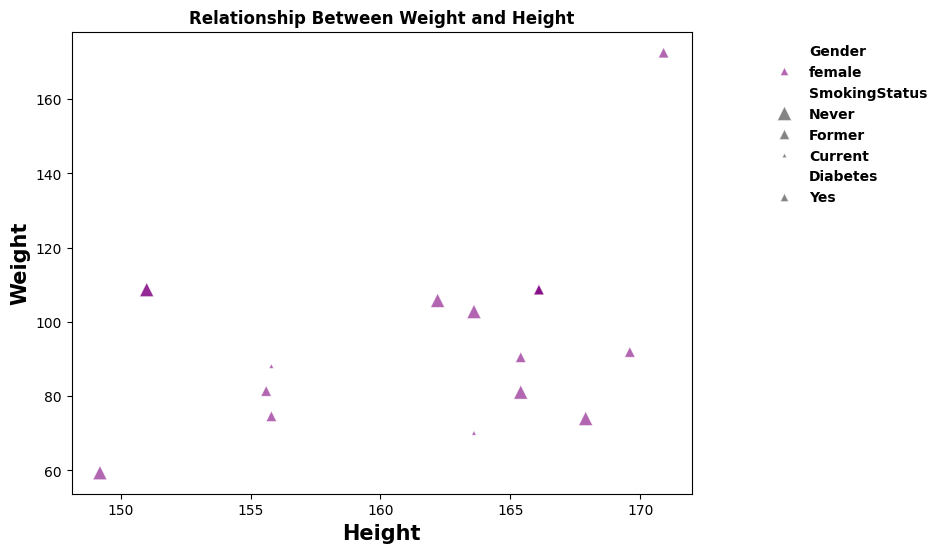

In [8]:
#Task 2.7


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data

Public_Health = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv" #add data source
df = pd.read_csv(Public_Health, sep=",")


# Summary statistics
print(df.describe())

# Drop rows with missing values
df = df.dropna()

print(df.describe())

# Convert Weight to pounds
df['Weight_pounds'] = df['Weight'] * 2.2

# Set up the figure
plt.figure(figsize=(12, 10))

# Plot histograms
plt.subplot(2, 2, 1)
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')

plt.subplot(2, 2, 2)
sns.histplot(df['Weight_pounds'], bins=30, kde=True)
plt.title('Distribution of Weight (in pounds)')

plt.subplot(2, 2, 3)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

#Mean 60-Second Pulse Rate

mean_pulse_rate = df['Pulse'].mean()
print(f"Mean 60-second pulse rate: {mean_pulse_rate:.5f}")

#Range of Diastolic Blood Pressure

min_bp = df['BPDia'].min()
max_bp = df['BPDia'].max()
print(f"Range of Diastolic Blood Pressure: {min_bp} - {max_bp}")

#Variance and Standard Deviation for Income

income_variance = np.var(df['Income'], ddof=1)  # Sample variance
income_std = np.std(df['Income'], ddof=1)  # Sample standard deviation

print(f"Variance of Income: {income_variance:.2f}")
print(f"Standard Deviation of Income: {income_std:.2f}")

# Relationship Between Weight & Height (Colored by Gender)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Gender'], palette = ['purple', 'grey'])
plt.title("Weight vs Height (Colored by Gender)")
plt.xlabel('Height', size=15, weight='bold')
plt.ylabel('Weight', size=15, weight='bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1.0), frameon = False, prop = {'weight':'bold'}, fontsize='small')
plt.show()

# Relationship Between Weight & Height (Colored by Diabetes Status)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Diabetes'], palette = ['green', 'brown'])
plt.title("Weight vs Height (Colored by Diabetes Status)")
plt.xlabel('Height', size=15, weight='bold')
plt.ylabel('Weight', size=15, weight='bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1.0), frameon = False, prop = {'weight':'bold'}, fontsize='small')
plt.show()

# Relationship Between Weight & Height (Colored by Smoking Status)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['SmokingStatus'])
plt.title("Weight vs Height (Colored by Smoking Status)")
plt.xlabel('Height', size=15, weight='bold')
plt.ylabel('Weight', size=15, weight='bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1.0), frameon = False, prop = {'weight':'bold'}, fontsize='small')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Height', y='Weight',
                hue='Gender', palette = ['purple', 'grey'],
               style='Diabetes', markers= ['^', 'o'],
               size="SmokingStatus",  # Different sizes for Smoking Status
               sizes=(10, 100),  # Adjust size range for better visualization
                alpha=0.6)  # Transparency for overlapping points


plt.title('Relationship Between Weight and Height', weight='bold')
plt.xlabel('Height', size=15, weight='bold')
plt.ylabel('Weight', size=15, weight='bold')
plt.legend(loc = 1, bbox_to_anchor = (1.4, 1.0), frameon = False, prop = {'weight':'bold'}, fontsize='small')
plt.show()



In [5]:
!pip install scip

In [6]:
from scipy import stats

#t-test between Age vs Gender
male_age = df[df['Gender'] == 'Male']['Age']
female_age = df[df['Gender'] == 'Female']['Age']

t_stat, p_value = stats.ttest_ind(male_age, female_age, equal_var=False)
print(f"T-test for Age and Gender: T-Statistic={t_stat:.4f}, P-Value={p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in Age based on Gender.")
else:
    print("No significant difference in Age based on Gender.")

#t-test between Diabetes vs BMI
diabetes_bmi = df[df['Diabetes'] == 'Yes']['BMI']
non_diabetes_bmi = df[df['Diabetes'] == 'No']['BMI']

t_stat, p_value = stats.ttest_ind(diabetes_bmi, non_diabetes_bmi, equal_var=False)
print(f"T-test for BMI and Diabetes: T-Statistic={t_stat:.4f}, P-Value={p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in BMI based on Diabetes status.")
else:
    print("No significant difference in BMI based on Diabetes status.")

#t-test between Alcohol Consumption vs Relationship Status
single_alcohol = df[df['RelationshipStatus'] == 'Single']['AlcoholYear']
married_alcohol = df[df['RelationshipStatus'] == 'Married']['AlcoholYear']

t_stat, p_value = stats.ttest_ind(single_alcohol, married_alcohol, equal_var=False)
print(f"T-test for Alcohol Consumption and Relationship Status: T-Statistic={t_stat:.4f}, P-Value={p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in Alcohol Consumption based on Relationship Status.")
else:
    print("No significant difference in Alcohol Consumption based on Relationship Status.")


# github profile for team
# Ogunoye Blessing's Github page: https://github.com/to-ibukun
# Obakpolo Charis-Grace Github page: https://github.com/CeeGeeObas
# Funmilayo Ligali's Github page: https://github.com/Christianah001
# Fatemah Alsolaiman's Github page: https://github.com/92Faty

T-test for Age and Gender: T-Statistic=nan, P-Value=nan
No significant difference in Age based on Gender.
T-test for BMI and Diabetes: T-Statistic=nan, P-Value=nan
No significant difference in BMI based on Diabetes status.
T-test for Alcohol Consumption and Relationship Status: T-Statistic=nan, P-Value=nan
No significant difference in Alcohol Consumption based on Relationship Status.


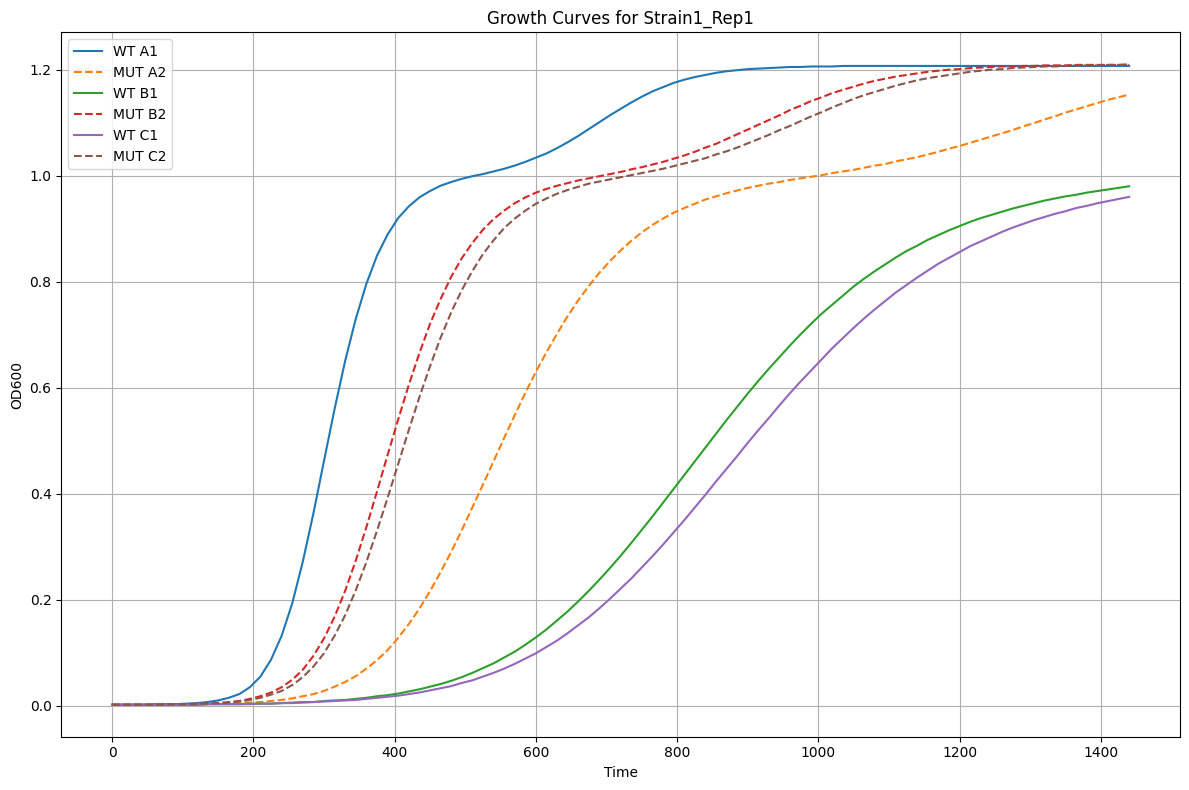

Time to reach carrying capacity for WT_A1: 95 minutes
Time to reach carrying capacity for MUT_A2: 95 minutes
Time to reach carrying capacity for WT_B1: 93 minutes
Time to reach carrying capacity for MUT_B2: 95 minutes
Time to reach carrying capacity for WT_C1: 93 minutes
Time to reach carrying capacity for MUT_C2: 95 minutes


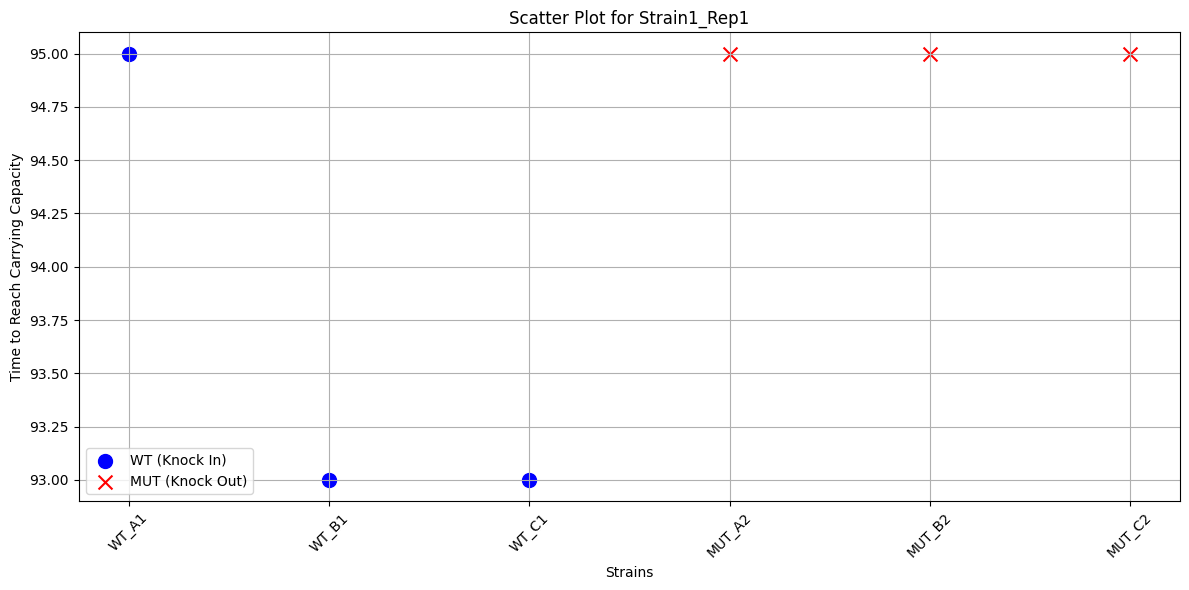

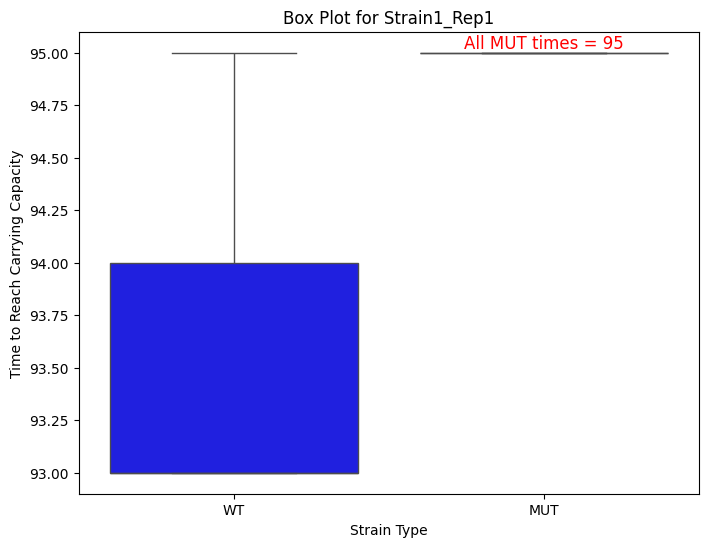

T-test results for Strain1_Rep1:
t-statistic: -4.638741920811847
p-value: 4.336082356822398e-06



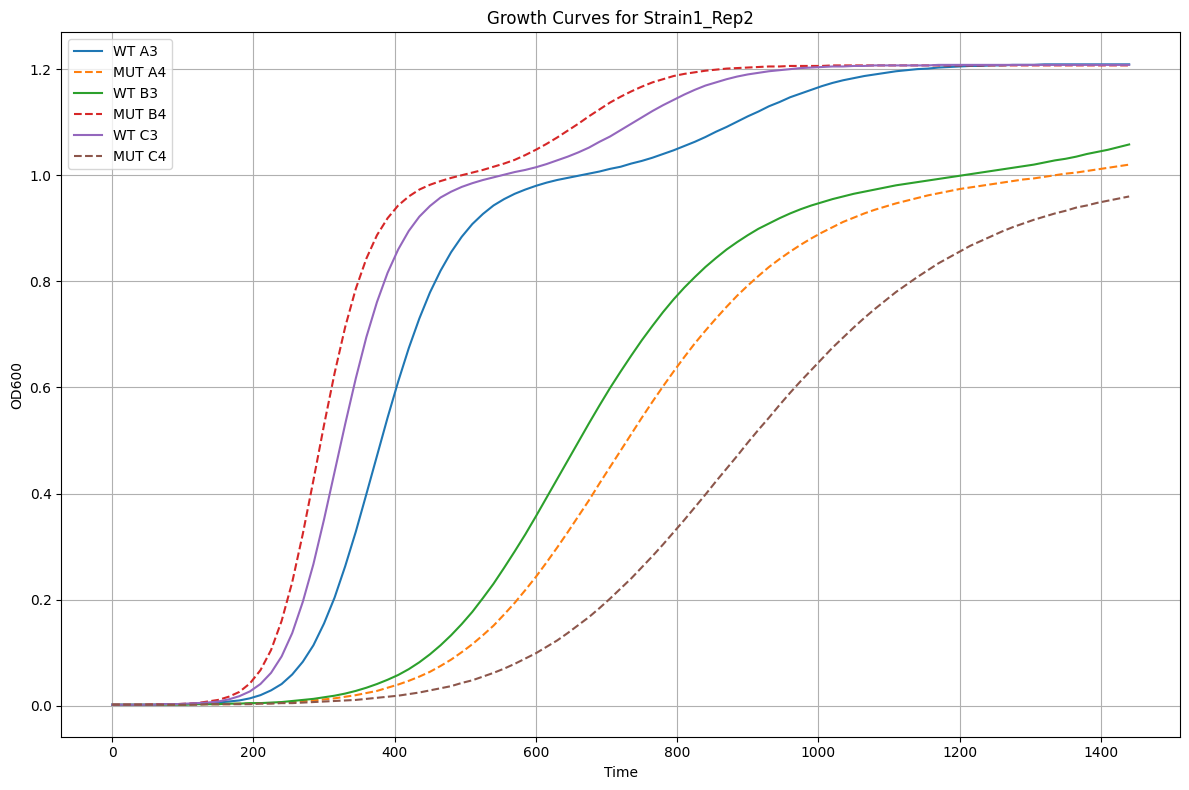

Time to reach carrying capacity for WT_A3: 95 minutes
Time to reach carrying capacity for MUT_A4: 94 minutes
Time to reach carrying capacity for WT_B3: 94 minutes
Time to reach carrying capacity for MUT_B4: 95 minutes
Time to reach carrying capacity for WT_C3: 95 minutes
Time to reach carrying capacity for MUT_C4: 93 minutes


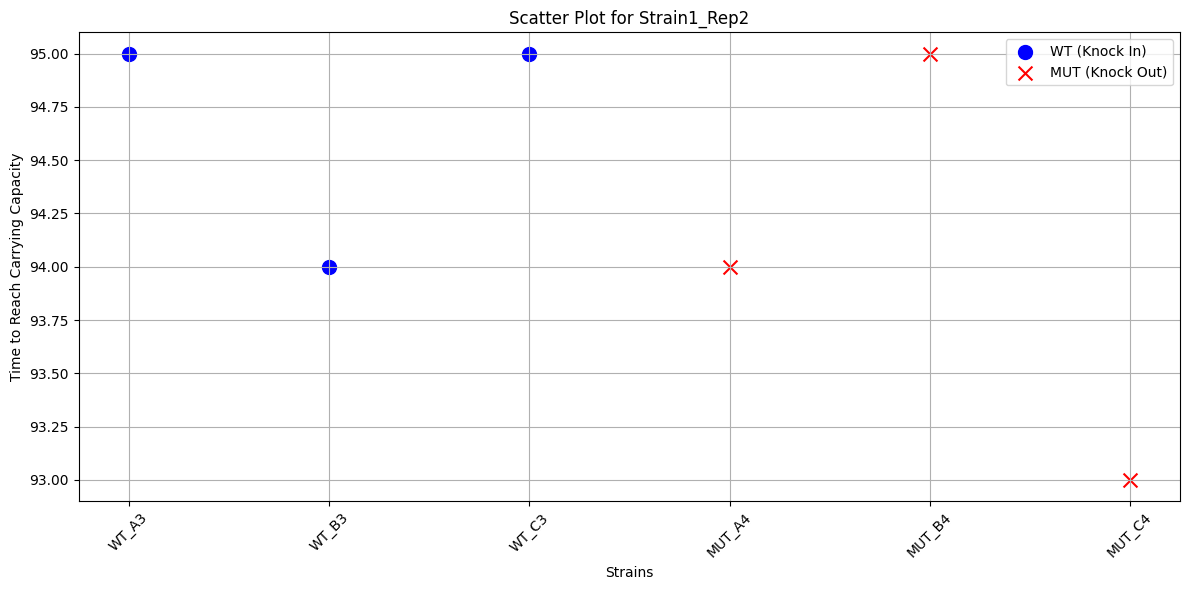

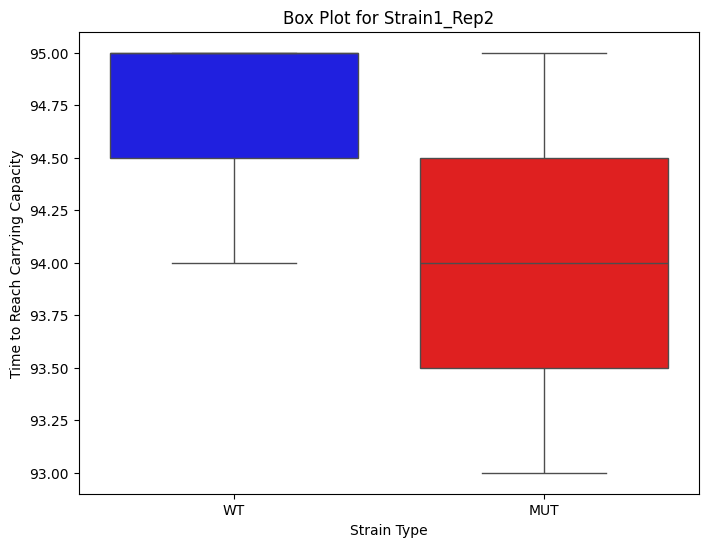

T-test results for Strain1_Rep2:
t-statistic: 3.961148213895282
p-value: 8.387417072728984e-05



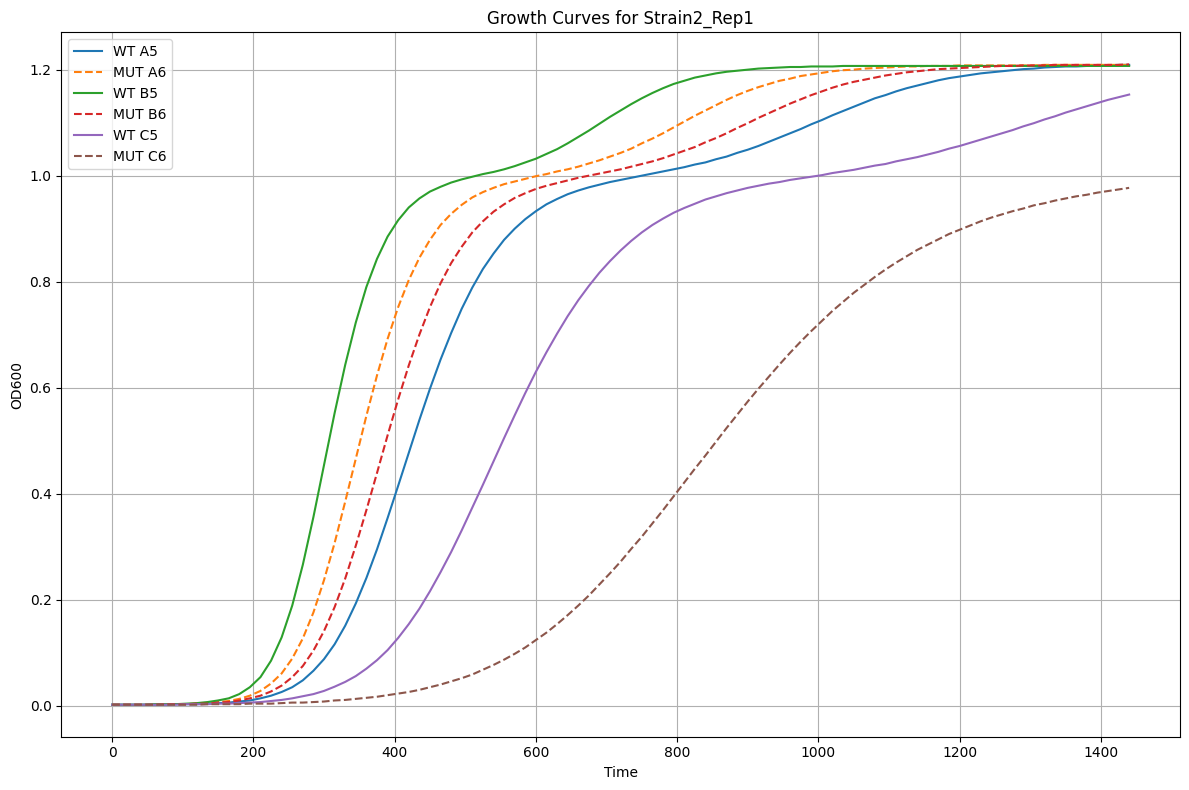

Time to reach carrying capacity for WT_A5: 95 minutes
Time to reach carrying capacity for MUT_A6: 95 minutes
Time to reach carrying capacity for WT_B5: 95 minutes
Time to reach carrying capacity for MUT_B6: 95 minutes
Time to reach carrying capacity for WT_C5: 95 minutes
Time to reach carrying capacity for MUT_C6: 93 minutes


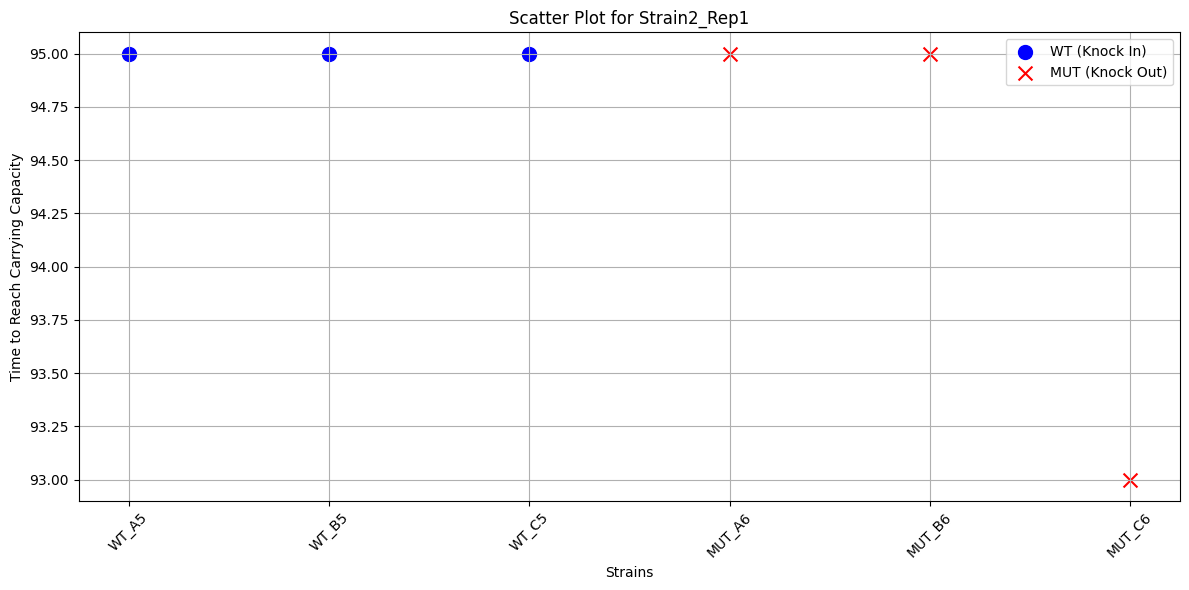

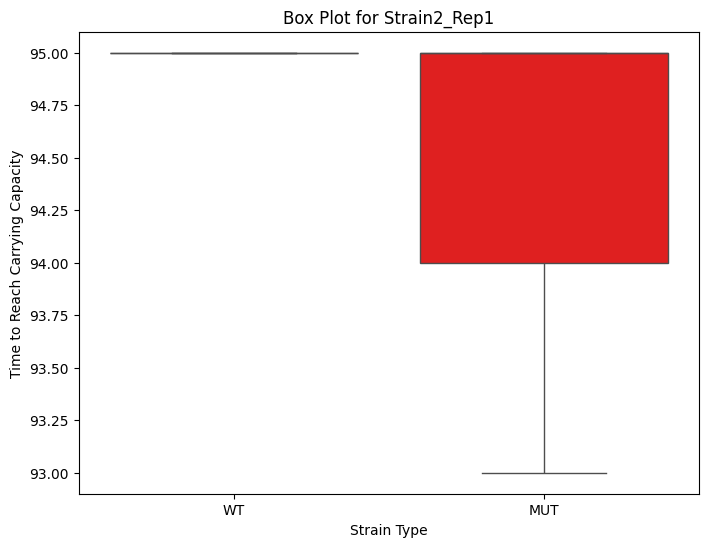

T-test results for Strain2_Rep1:
t-statistic: 2.0469155002144146
p-value: 0.041116505439487534



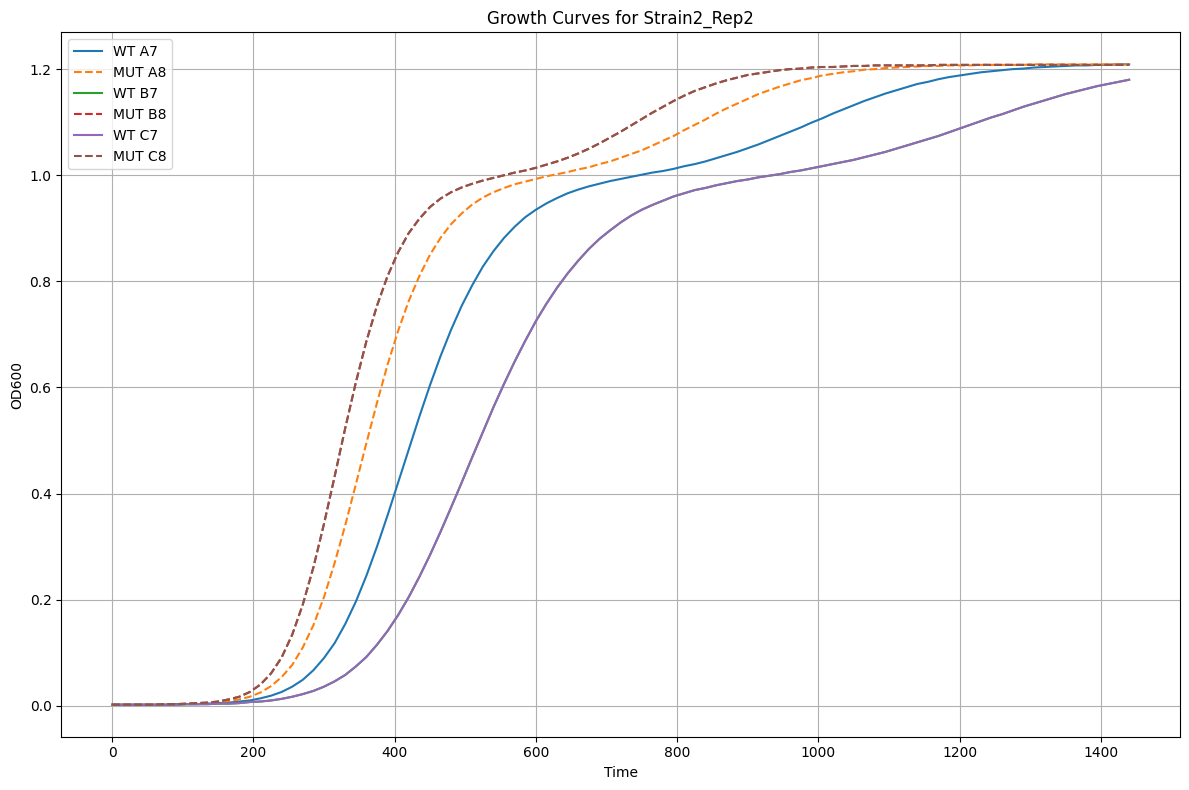

Time to reach carrying capacity for WT_A7: 95 minutes
Time to reach carrying capacity for MUT_A8: 95 minutes
Time to reach carrying capacity for WT_B7: 95 minutes
Time to reach carrying capacity for MUT_B8: 95 minutes
Time to reach carrying capacity for WT_C7: 95 minutes
Time to reach carrying capacity for MUT_C8: 95 minutes


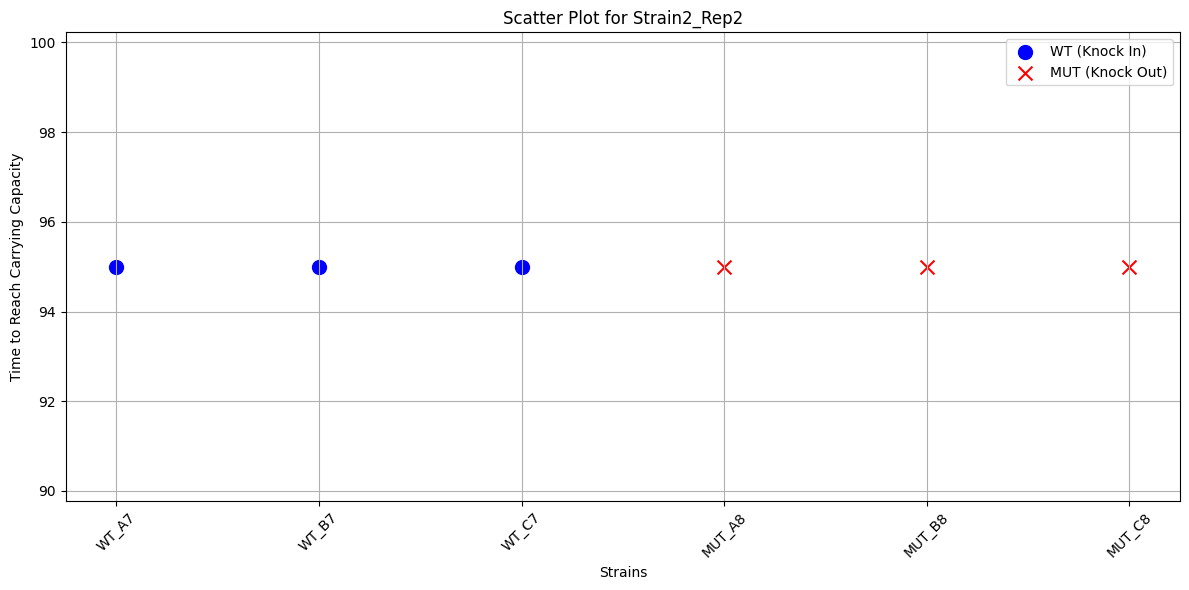

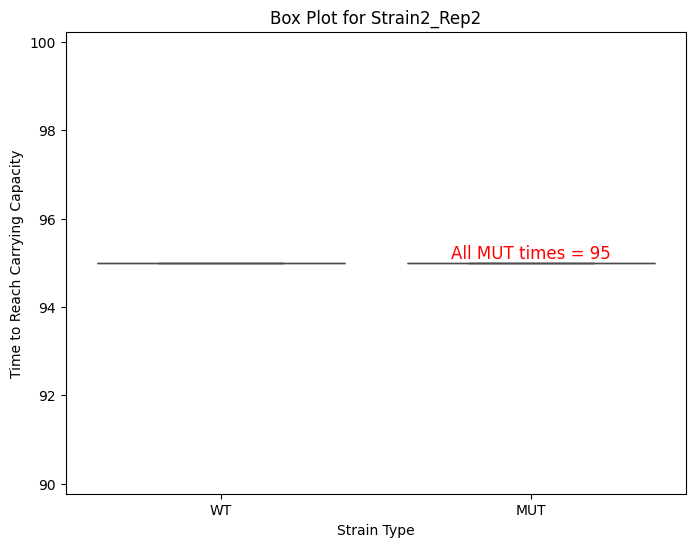

T-test results for Strain2_Rep2:
t-statistic: -4.188718534308386
p-value: 3.24204873048834e-05



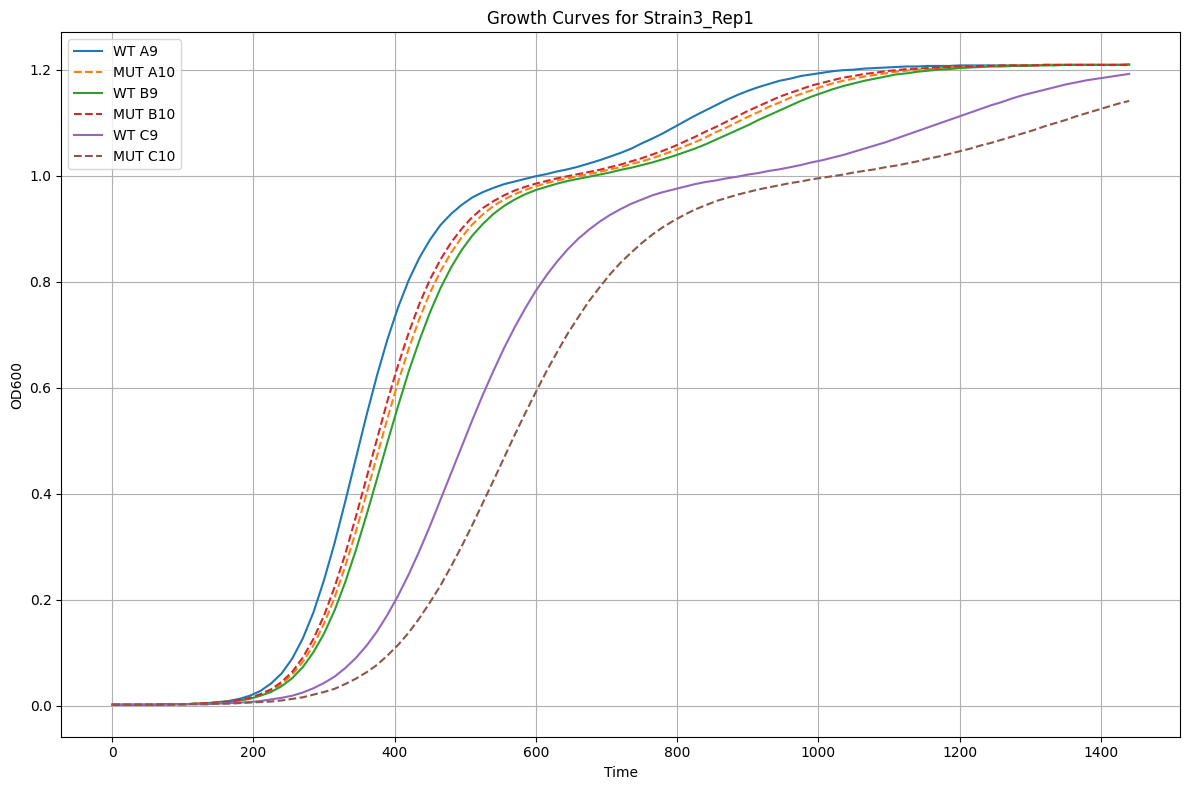

Time to reach carrying capacity for WT_A9: 95 minutes
Time to reach carrying capacity for MUT_A10: 95 minutes
Time to reach carrying capacity for WT_B9: 95 minutes
Time to reach carrying capacity for MUT_B10: 95 minutes
Time to reach carrying capacity for WT_C9: 95 minutes
Time to reach carrying capacity for MUT_C10: 95 minutes


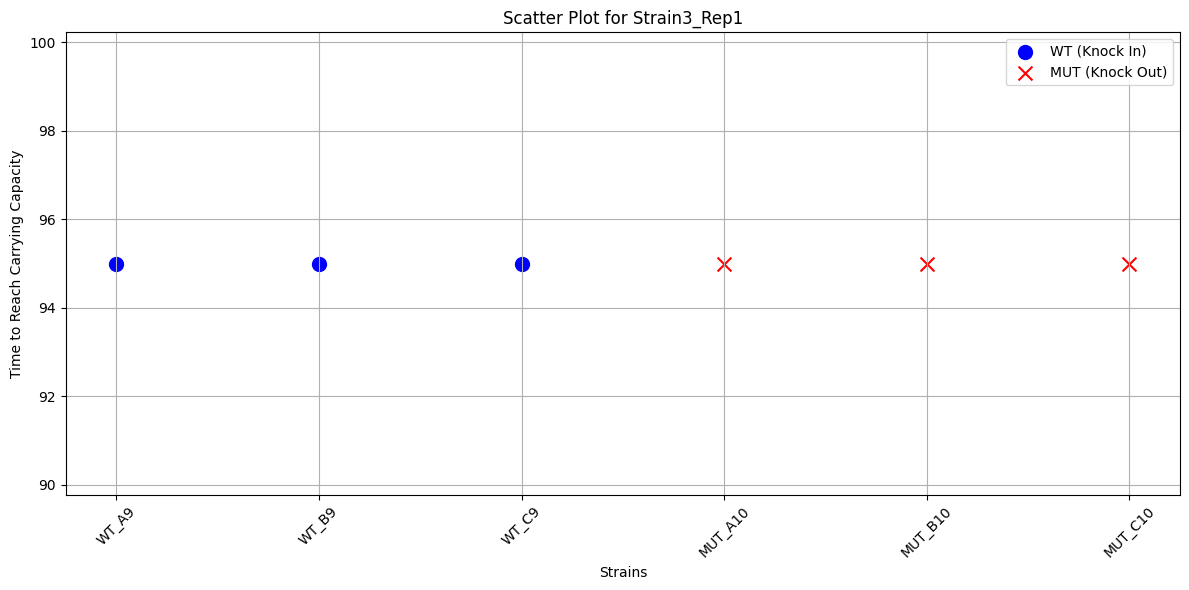

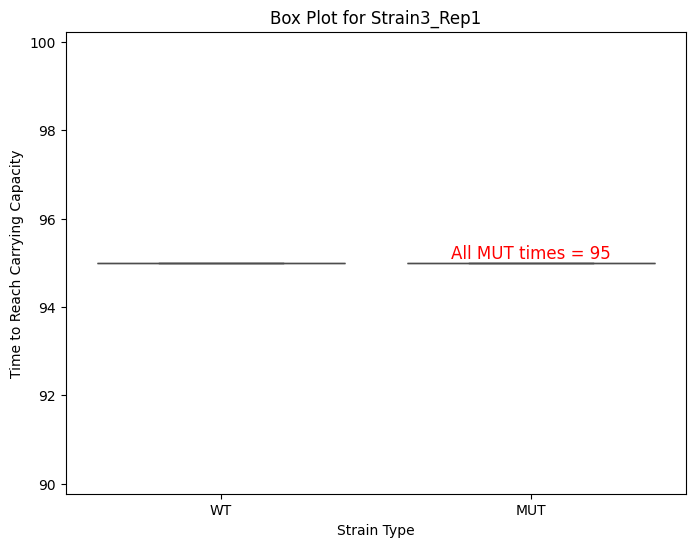

T-test results for Strain3_Rep1:
t-statistic: 0.7026377671151713
p-value: 0.482563422393129



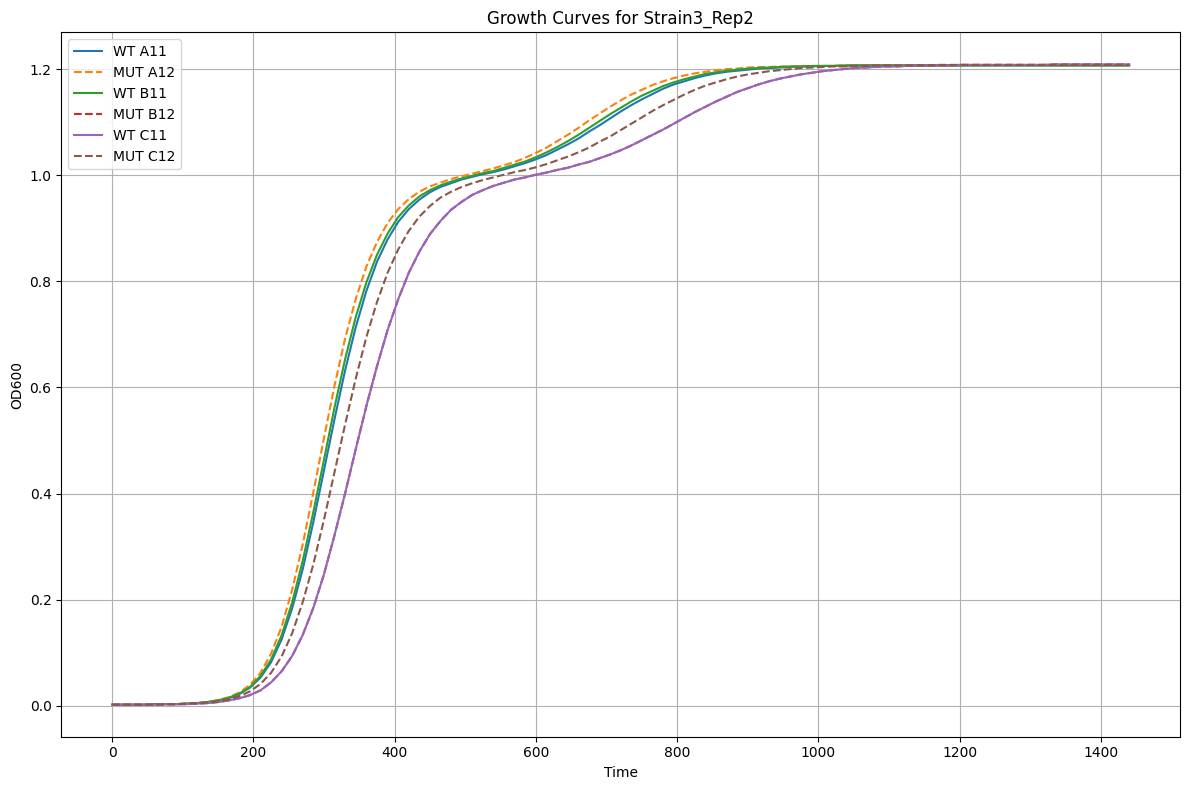

Time to reach carrying capacity for WT_A11: 95 minutes
Time to reach carrying capacity for MUT_A12: 95 minutes
Time to reach carrying capacity for WT_B11: 95 minutes
Time to reach carrying capacity for MUT_B12: 95 minutes
Time to reach carrying capacity for WT_C11: 95 minutes
Time to reach carrying capacity for MUT_C12: 95 minutes


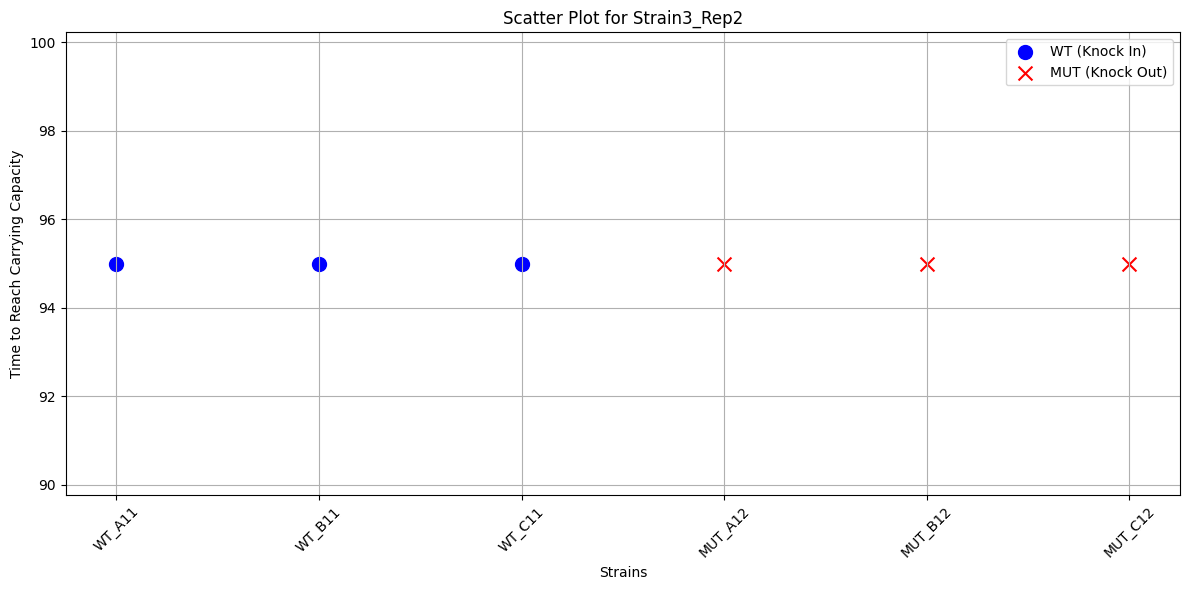

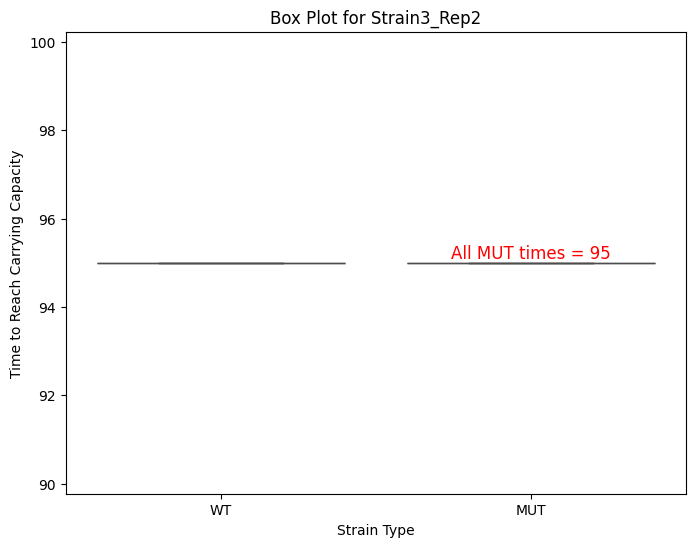

T-test results for Strain3_Rep2:
t-statistic: 0.09500005731902991
p-value: 0.9243475927160669



In [9]:
#STAGE 2 (MICROBIOLOGY TASK)
#Task 2.1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# dictionaries
Strain1_Rep1_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A1': [0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.004,  0.005,  0.007,  0.01,  0.015,  0.022,  0.035,  0.055,  0.087,  0.132,  0.193,  0.272,  0.363,  0.462,  0.56,  0.651,  0.73,  0.796,  0.849,  0.889,  0.92,  0.942,  0.959,  0.971,  0.981,  0.988,  0.994,  0.999,  1.003,  1.008,  1.013,  1.019,  1.026,  1.034,  1.042,  1.052,  1.063,  1.075,  1.088,  1.101,  1.114,  1.126,  1.138,  1.149,  1.159,  1.167,  1.175,  1.181,  1.186,  1.19,  1.194,  1.197,  1.199,  1.201,  1.202,  1.203,  1.204,  1.205,  1.205,  1.206,  1.206,  1.206,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207],

    'MUT_A2': [0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.004,  0.004,  0.005,  0.006,  0.007,  0.009,  0.011,  0.014,  0.018,  0.022,  0.028,  0.036,  0.045,  0.056,  0.07,  0.086,  0.105,  0.128,  0.154,  0.183,  0.216,  0.252,  0.29,  0.331,  0.374,  0.417,  0.461,  0.505,  0.548,  0.59,  0.63,  0.667,  0.702,  0.735,  0.765,  0.792,  0.817,  0.839,  0.859,  0.877,  0.893,  0.907,  0.919,  0.93,  0.939,  0.947,  0.955,  0.961,  0.967,  0.972,  0.977,  0.981,  0.985,  0.988,  0.992,  0.995,  0.998,  1.001,  1.005,  1.008,  1.011,  1.015,  1.019,  1.022,  1.027,  1.031,  1.035,  1.04,  1.045,  1.051,  1.056,  1.062,  1.068,  1.074,  1.08,  1.086,  1.093,  1.099,  1.106,  1.112,  1.119,  1.125,  1.131,  1.137,  1.143,  1.148,  1.153],

    'WT_B1': [ 0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.003,  0.004,  0.004,  0.004,  0.005,  0.006,  0.007,  0.007,  0.009,  0.01,  0.011,  0.013,  0.015,  0.018,  0.02,  0.023,  0.027,  0.031,  0.036,  0.041,  0.047,  0.054,  0.062,  0.071,  0.08,  0.091,  0.102,  0.115,  0.129,  0.144,  0.161,  0.178,  0.197,  0.217,  0.238,  0.26,  0.283,  0.307,  0.332,  0.357,  0.383,  0.409,  0.435,  0.461,  0.487,  0.513,  0.539,  0.564,  0.589,  0.613,  0.636,  0.658,  0.68,  0.701,  0.721,  0.74,  0.757,  0.774,  0.791,  0.806,  0.82,  0.833,  0.846,  0.858,  0.868,  0.879,  0.888,  0.897,  0.905,  0.913,  0.92,  0.926,  0.932,  0.938,  0.943,  0.948,  0.953,  0.957,  0.961,  0.964,  0.968,  0.971,  0.974,  0.977,  0.98],

    'MUT_B2': [ 0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.004,  0.004,  0.005,  0.007,  0.009,  0.013,  0.018,  0.025,  0.035,  0.049,  0.068,  0.094,  0.127,  0.168,  0.217,  0.274,  0.337,  0.404,  0.473,  0.54,  0.605,  0.665,  0.72,  0.767,  0.809,  0.844,  0.873,  0.898,  0.918,  0.934,  0.948,  0.959,  0.968,  0.975,  0.981,  0.986,  0.991,  0.995,  0.999,  1.003,  1.007,  1.012,  1.016,  1.021,  1.026,  1.032,  1.038,  1.045,  1.053,  1.06,  1.069,  1.078,  1.087,  1.096,  1.105,  1.114,  1.124,  1.132,  1.141,  1.148,  1.156,  1.162,  1.168,  1.174,  1.179,  1.183,  1.187,  1.19,  1.193,  1.196,  1.198,  1.2,  1.201,  1.203,  1.204,  1.205,  1.206,  1.206,  1.207,  1.207,  1.208,  1.208,  1.208,  1.209,  1.209,  1.209,  1.209,  1.209,  1.21],

    'WT_C1': [0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.003,  0.003,  0.004,  0.004,  0.005,  0.005,  0.006,  0.007,  0.008,  0.009,  0.01,  0.011,  0.013,  0.015,  0.017,  0.019,  0.022,  0.025,  0.029,  0.033,  0.037,  0.043,  0.048,  0.055,  0.062,  0.07,  0.079,  0.089,  0.099,  0.111,  0.123,  0.137,  0.152,  0.167,  0.184,  0.202,  0.221,  0.24,  0.261,  0.282,  0.304,  0.327,  0.35,  0.374,  0.398,  0.423,  0.447,  0.471,  0.496,  0.52,  0.543,  0.567,  0.59,  0.612,  0.633,  0.654,  0.675,  0.694,  0.713,  0.731,  0.748,  0.764,  0.78,  0.794,  0.808,  0.821,  0.834,  0.845,  0.856,  0.867,  0.876,  0.885,  0.894,  0.902,  0.909,  0.916,  0.922,  0.928,  0.933,  0.939,  0.943,  0.948,  0.952,  0.956,  0.96],

    'MUT_C2': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.011, 0.015, 0.021, 0.028, 0.039, 0.054, 0.074, 0.099, 0.132, 0.171, 0.218, 0.271, 0.33, 0.392, 0.456, 0.52, 0.582, 0.64, 0.694, 0.742, 0.784, 0.82, 0.852, 0.878, 0.901, 0.919, 0.934, 0.947, 0.957, 0.966, 0.973, 0.979, 0.985, 0.989, 0.993, 0.997, 1.001, 1.005, 1.009, 1.013, 1.018, 1.023, 1.028, 1.033, 1.04, 1.046, 1.053, 1.061, 1.069, 1.077, 1.086, 1.094, 1.103, 1.112, 1.12, 1.129, 1.137, 1.145, 1.152, 1.158, 1.164, 1.17, 1.175, 1.18, 1.184, 1.187, 1.19, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209]
}

Strain1_Rep2_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A3': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.02, 0.029, 0.041, 0.059, 0.083, 0.114, 0.155, 0.204, 0.263, 0.328, 0.399, 0.471, 0.543, 0.611, 0.674, 0.73, 0.779, 0.82, 0.855, 0.884, 0.908, 0.927, 0.943, 0.955, 0.965, 0.973, 0.98, 0.986, 0.991, 0.995, 0.999, 1.003, 1.007, 1.012, 1.016, 1.022, 1.027, 1.033, 1.04, 1.047, 1.055, 1.063, 1.072, 1.082, 1.091, 1.101, 1.111, 1.12, 1.13, 1.138, 1.147, 1.154, 1.161, 1.168, 1.174, 1.179, 1.183, 1.187, 1.19, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'MUT_A4': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.005, 0.006, 0.007, 0.009, 0.01, 0.012, 0.014, 0.017, 0.02, 0.024, 0.028, 0.034, 0.04, 0.047, 0.055, 0.064, 0.075, 0.087, 0.101, 0.116, 0.133, 0.151, 0.172, 0.194, 0.218, 0.243, 0.27, 0.298, 0.327, 0.357, 0.387, 0.419, 0.45, 0.481, 0.512, 0.543, 0.573, 0.602, 0.63, 0.657, 0.683, 0.707, 0.73, 0.752, 0.773, 0.792, 0.81, 0.827, 0.842, 0.856, 0.869, 0.881, 0.892, 0.902, 0.912, 0.92, 0.928, 0.935, 0.941, 0.947, 0.952, 0.957, 0.962, 0.966, 0.97, 0.974, 0.977, 0.98, 0.983, 0.986, 0.989, 0.992, 0.994, 0.997, 1, 1.003, 1.005, 1.008, 1.011, 1.014, 1.017, 1.02],

    'WT_B3': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.005, 0.006, 0.007, 0.009, 0.011, 0.013, 0.016, 0.019, 0.023, 0.028, 0.034, 0.041, 0.049, 0.058, 0.069, 0.082, 0.097, 0.114, 0.133, 0.154, 0.177, 0.203, 0.23, 0.26, 0.291, 0.323, 0.357, 0.392, 0.427, 0.462, 0.497, 0.532, 0.566, 0.599, 0.63, 0.66, 0.689, 0.716, 0.742, 0.766, 0.788, 0.808, 0.827, 0.844, 0.86, 0.874, 0.887, 0.899, 0.909, 0.919, 0.928, 0.936, 0.943, 0.949, 0.955, 0.96, 0.965, 0.969, 0.973, 0.977, 0.981, 0.984, 0.987, 0.99, 0.993, 0.996, 0.999, 1.002, 1.005, 1.008, 1.011, 1.014, 1.017, 1.02, 1.024, 1.028, 1.031, 1.035, 1.04, 1.044, 1.048, 1.053, 1.058],

    'MUT_B4': [0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.008, 0.011, 0.017, 0.026, 0.042, 0.067, 0.105, 0.16, 0.233, 0.324, 0.425, 0.529, 0.627, 0.714, 0.786, 0.843, 0.887, 0.919, 0.943, 0.96, 0.973, 0.982, 0.989, 0.995, 1, 1.005, 1.01, 1.016, 1.022, 1.029, 1.038, 1.048, 1.059, 1.071, 1.084, 1.097, 1.111, 1.124, 1.137, 1.148, 1.158, 1.167, 1.175, 1.181, 1.187, 1.191, 1.194, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'WT_C3': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.018, 0.027, 0.041, 0.062, 0.093, 0.137, 0.196, 0.267, 0.351, 0.441, 0.531, 0.617, 0.695, 0.761, 0.816, 0.86, 0.895, 0.922, 0.942, 0.958, 0.969, 0.978, 0.985, 0.991, 0.996, 1.001, 1.006, 1.01, 1.015, 1.021, 1.028, 1.035, 1.043, 1.052, 1.063, 1.073, 1.085, 1.097, 1.109, 1.121, 1.132, 1.142, 1.152, 1.161, 1.169, 1.175, 1.181, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208],

    'MUT_C4': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.013, 0.015, 0.017, 0.019, 0.022, 0.025, 0.029, 0.033, 0.037, 0.043, 0.048, 0.055, 0.062, 0.07, 0.079, 0.089, 0.099, 0.111, 0.123, 0.137, 0.152, 0.167, 0.184, 0.202, 0.221, 0.24, 0.261, 0.282, 0.304, 0.327, 0.35, 0.374, 0.398, 0.423, 0.447, 0.471, 0.496, 0.52, 0.543, 0.567, 0.59, 0.612, 0.633, 0.654, 0.675, 0.694, 0.713, 0.731, 0.748, 0.764, 0.78, 0.794, 0.808, 0.821, 0.834, 0.845, 0.856, 0.867, 0.876, 0.885, 0.894, 0.902, 0.909, 0.916, 0.922, 0.928, 0.933, 0.939, 0.943, 0.948, 0.952, 0.956, 0.96]
}

Strain2_Rep1_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A5': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.019, 0.026, 0.035, 0.048, 0.066, 0.088, 0.116, 0.151, 0.193, 0.241, 0.295, 0.354, 0.415, 0.477, 0.539, 0.598, 0.653, 0.703, 0.749, 0.789, 0.824, 0.853, 0.879, 0.9, 0.918, 0.933, 0.946, 0.956, 0.965, 0.972, 0.978, 0.983, 0.988, 0.992, 0.996, 1, 1.004, 1.008, 1.012, 1.016, 1.021, 1.025, 1.031, 1.036, 1.043, 1.049, 1.056, 1.064, 1.072, 1.08, 1.088, 1.097, 1.105, 1.114, 1.122, 1.13, 1.138, 1.146, 1.152, 1.159, 1.165, 1.17, 1.175, 1.18, 1.184, 1.187, 1.19, 1.193, 1.195, 1.197, 1.199, 1.201, 1.202, 1.204, 1.205, 1.206, 1.206, 1.207, 1.208, 1.208, 1.209, 1.209],

    'MUT_A6': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.009, 0.013, 0.019, 0.028, 0.042, 0.061, 0.089, 0.127, 0.176, 0.237, 0.307, 0.385, 0.466, 0.547, 0.623, 0.692, 0.752, 0.803, 0.845, 0.879, 0.907, 0.928, 0.945, 0.959, 0.969, 0.977, 0.984, 0.989, 0.994, 0.999, 1.003, 1.008, 1.012, 1.017, 1.023, 1.029, 1.036, 1.043, 1.051, 1.061, 1.07, 1.08, 1.091, 1.102, 1.113, 1.123, 1.133, 1.143, 1.152, 1.16, 1.167, 1.173, 1.179, 1.183, 1.188, 1.191, 1.194, 1.197, 1.199, 1.2, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_B5': [0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.022, 0.035, 0.054, 0.085, 0.129, 0.189, 0.266, 0.356, 0.454, 0.552, 0.643, 0.723, 0.79, 0.843, 0.885, 0.916, 0.94, 0.957, 0.97, 0.979, 0.987, 0.993, 0.998, 1.003, 1.007, 1.012, 1.018, 1.025, 1.032, 1.041, 1.05, 1.061, 1.073, 1.085, 1.098, 1.111, 1.123, 1.135, 1.146, 1.156, 1.165, 1.173, 1.179, 1.185, 1.189, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'MUT_B6': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.006, 0.007, 0.01, 0.014, 0.019, 0.027, 0.038, 0.054, 0.075, 0.104, 0.141, 0.186, 0.24, 0.302, 0.369, 0.439, 0.51, 0.578, 0.642, 0.7, 0.752, 0.797, 0.835, 0.866, 0.893, 0.914, 0.932, 0.946, 0.958, 0.967, 0.975, 0.981, 0.986, 0.991, 0.996, 1, 1.004, 1.008, 1.012, 1.017, 1.022, 1.027, 1.033, 1.04, 1.047, 1.054, 1.063, 1.071, 1.08, 1.09, 1.099, 1.109, 1.118, 1.127, 1.136, 1.144, 1.152, 1.159, 1.166, 1.172, 1.177, 1.181, 1.185, 1.189, 1.192, 1.195, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.21],

    'WT_C5': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.006, 0.007, 0.009, 0.011, 0.014, 0.018, 0.022, 0.028, 0.036, 0.045, 0.056, 0.07, 0.086, 0.105, 0.128, 0.154, 0.183, 0.216, 0.252, 0.29, 0.331, 0.374, 0.417, 0.461, 0.505, 0.548, 0.59, 0.63, 0.667, 0.702, 0.735, 0.765, 0.792, 0.817, 0.839, 0.859, 0.877, 0.893, 0.907, 0.919, 0.93, 0.939, 0.947, 0.955, 0.961, 0.967, 0.972, 0.977, 0.981, 0.985, 0.988, 0.992, 0.995, 0.998, 1.001, 1.005, 1.008, 1.011, 1.015, 1.019, 1.022, 1.027, 1.031, 1.035, 1.04, 1.045, 1.051, 1.056, 1.062, 1.068, 1.074, 1.08, 1.086, 1.093, 1.099, 1.106, 1.112, 1.119, 1.125, 1.131, 1.137, 1.143, 1.148, 1.153],

    'MUT_C6': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.005, 0.006, 0.006, 0.007, 0.008, 0.01, 0.011, 0.013, 0.015, 0.017, 0.02, 0.023, 0.026, 0.03, 0.035, 0.04, 0.046, 0.052, 0.059, 0.068, 0.077, 0.087, 0.098, 0.11, 0.124, 0.138, 0.154, 0.171, 0.189, 0.208, 0.229, 0.25, 0.272, 0.296, 0.319, 0.344, 0.369, 0.395, 0.421, 0.447, 0.472, 0.498, 0.524, 0.549, 0.574, 0.598, 0.621, 0.644, 0.666, 0.687, 0.707, 0.726, 0.745, 0.762, 0.779, 0.794, 0.809, 0.823, 0.836, 0.848, 0.86, 0.87, 0.88, 0.89, 0.898, 0.906, 0.914, 0.921, 0.927, 0.933, 0.938, 0.944, 0.948, 0.953, 0.957, 0.961, 0.964, 0.968, 0.971, 0.974, 0.977]
}

Strain2_Rep2_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A7': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.019, 0.026, 0.036, 0.049, 0.067, 0.09, 0.118, 0.154, 0.196, 0.245, 0.3, 0.359, 0.421, 0.483, 0.545, 0.604, 0.659, 0.709, 0.754, 0.793, 0.828, 0.857, 0.882, 0.903, 0.921, 0.935, 0.947, 0.957, 0.966, 0.973, 0.979, 0.984, 0.989, 0.993, 0.997, 1.001, 1.005, 1.008, 1.012, 1.017, 1.021, 1.026, 1.032, 1.038, 1.044, 1.051, 1.058, 1.066, 1.074, 1.082, 1.09, 1.099, 1.107, 1.116, 1.124, 1.132, 1.14, 1.147, 1.154, 1.16, 1.166, 1.172, 1.176, 1.181, 1.185, 1.188, 1.191, 1.194, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.207, 1.207, 1.208, 1.208, 1.209, 1.209],

    'MUT_A8': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.009, 0.012, 0.017, 0.025, 0.037, 0.054, 0.077, 0.11, 0.152, 0.205, 0.269, 0.34, 0.417, 0.495, 0.571, 0.643, 0.707, 0.763, 0.81, 0.85, 0.882, 0.908, 0.928, 0.945, 0.958, 0.968, 0.976, 0.983, 0.988, 0.993, 0.998, 1.002, 1.006, 1.011, 1.015, 1.021, 1.026, 1.033, 1.04, 1.047, 1.056, 1.065, 1.074, 1.085, 1.095, 1.105, 1.116, 1.126, 1.135, 1.144, 1.153, 1.16, 1.167, 1.173, 1.179, 1.183, 1.188, 1.191, 1.194, 1.196, 1.199, 1.2, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_B7': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.007, 0.008, 0.01, 0.013, 0.017, 0.022, 0.028, 0.036, 0.046, 0.058, 0.074, 0.092, 0.115, 0.141, 0.171, 0.205, 0.243, 0.284, 0.328, 0.374, 0.421, 0.469, 0.516, 0.563, 0.607, 0.649, 0.688, 0.725, 0.758, 0.788, 0.815, 0.839, 0.861, 0.88, 0.896, 0.911, 0.924, 0.935, 0.944, 0.952, 0.96, 0.966, 0.972, 0.976, 0.981, 0.985, 0.989, 0.992, 0.996, 0.999, 1.002, 1.006, 1.009, 1.013, 1.017, 1.021, 1.025, 1.029, 1.034, 1.039, 1.044, 1.05, 1.056, 1.062, 1.068, 1.074, 1.081, 1.088, 1.095, 1.102, 1.109, 1.115, 1.122, 1.129, 1.135, 1.141, 1.147, 1.153, 1.158, 1.163, 1.168, 1.172, 1.176, 1.18],

    'MUT_B8': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.017, 0.026, 0.04, 0.061, 0.091, 0.134, 0.191, 0.261, 0.343, 0.432, 0.523, 0.609, 0.687, 0.754, 0.81, 0.855, 0.891, 0.918, 0.94, 0.956, 0.968, 0.977, 0.984, 0.99, 0.995, 1, 1.005, 1.009, 1.014, 1.02, 1.026, 1.033, 1.041, 1.05, 1.06, 1.071, 1.082, 1.094, 1.106, 1.118, 1.129, 1.14, 1.15, 1.159, 1.166, 1.173, 1.179, 1.184, 1.189, 1.192, 1.195, 1.198, 1.2, 1.201, 1.203, 1.204, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208],

    'WT_C7': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.007, 0.008, 0.01, 0.013, 0.017, 0.022, 0.028, 0.036, 0.046, 0.058, 0.074, 0.092, 0.115, 0.141, 0.171, 0.205, 0.243, 0.284, 0.328, 0.374, 0.421, 0.469, 0.516, 0.563, 0.607, 0.649, 0.688, 0.725, 0.758, 0.788, 0.815, 0.839, 0.861, 0.88, 0.896, 0.911, 0.924, 0.935, 0.944, 0.952, 0.96, 0.966, 0.972, 0.976, 0.981, 0.985, 0.989, 0.992, 0.996, 0.999, 1.002, 1.006, 1.009, 1.013, 1.017, 1.021, 1.025, 1.029, 1.034, 1.039, 1.044, 1.05, 1.056, 1.062, 1.068, 1.074, 1.081, 1.088, 1.095, 1.102, 1.109, 1.115, 1.122, 1.129, 1.135, 1.141, 1.147, 1.153, 1.158, 1.163, 1.168, 1.172, 1.176, 1.18],

    'MUT_C8': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.017, 0.026, 0.04, 0.061, 0.091, 0.134, 0.191, 0.261, 0.343, 0.432, 0.523, 0.609, 0.687, 0.754, 0.81, 0.855, 0.891, 0.918, 0.94, 0.956, 0.968, 0.977, 0.984, 0.99, 0.995, 1, 1.005, 1.009, 1.014, 1.02, 1.026, 1.033, 1.041, 1.05, 1.06, 1.071, 1.082, 1.094, 1.106, 1.118, 1.129, 1.14, 1.15, 1.159, 1.166, 1.173, 1.179, 1.184, 1.189, 1.192, 1.195, 1.198, 1.2, 1.201, 1.203, 1.204, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208]
}

Strain3_Rep1_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A9': [ 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.009, 0.013, 0.019, 0.028, 0.042, 0.061, 0.089, 0.127, 0.176, 0.237, 0.307, 0.385, 0.466, 0.547, 0.623, 0.692, 0.752, 0.803, 0.845, 0.879, 0.907, 0.928, 0.945, 0.959, 0.969, 0.977, 0.984, 0.989, 0.994, 0.999, 1.003, 1.008, 1.012, 1.017, 1.023, 1.029, 1.036, 1.043, 1.051, 1.061, 1.07, 1.08, 1.091, 1.102, 1.113, 1.123, 1.133, 1.143, 1.152, 1.16, 1.167, 1.173, 1.179, 1.183, 1.188, 1.191, 1.194, 1.197, 1.199, 1.2, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'MUT_A10': [ 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.02, 0.029, 0.041, 0.059, 0.083, 0.114, 0.155, 0.204, 0.263, 0.328, 0.399, 0.471, 0.543, 0.611, 0.674, 0.73, 0.779, 0.82, 0.855, 0.884, 0.908, 0.927, 0.943, 0.955, 0.965, 0.973, 0.98, 0.986, 0.991, 0.995, 0.999, 1.003, 1.007, 1.012, 1.016, 1.022, 1.027, 1.033, 1.04, 1.047, 1.055, 1.063, 1.072, 1.082, 1.091, 1.101, 1.111, 1.12, 1.13, 1.138, 1.147, 1.154, 1.161, 1.168, 1.174, 1.179, 1.183, 1.187, 1.19, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_B9': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.006, 0.007, 0.01, 0.013, 0.019, 0.026, 0.037, 0.052, 0.073, 0.101, 0.136, 0.18, 0.233, 0.293, 0.359, 0.428, 0.498, 0.566, 0.631, 0.689, 0.742, 0.788, 0.827, 0.86, 0.887, 0.909, 0.928, 0.943, 0.955, 0.965, 0.973, 0.979, 0.985, 0.99, 0.994, 0.998, 1.002, 1.006, 1.011, 1.015, 1.02, 1.025, 1.031, 1.037, 1.044, 1.051, 1.059, 1.068, 1.077, 1.086, 1.095, 1.105, 1.114, 1.123, 1.132, 1.141, 1.149, 1.156, 1.163, 1.169, 1.174, 1.179, 1.183, 1.187, 1.191, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.21],

    'MUT_B10': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.011, 0.015, 0.022, 0.031, 0.045, 0.064, 0.091, 0.126, 0.17, 0.224, 0.286, 0.356, 0.429, 0.503, 0.576, 0.643, 0.704, 0.758, 0.804, 0.842, 0.874, 0.9, 0.922, 0.939, 0.952, 0.963, 0.972, 0.979, 0.985, 0.99, 0.995, 0.999, 1.003, 1.007, 1.011, 1.016, 1.021, 1.027, 1.033, 1.04, 1.047, 1.055, 1.064, 1.073, 1.083, 1.092, 1.102, 1.112, 1.122, 1.131, 1.14, 1.149, 1.156, 1.163, 1.17, 1.175, 1.18, 1.185, 1.188, 1.192, 1.194, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_C9': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.007, 0.009, 0.012, 0.015, 0.019, 0.025, 0.033, 0.043, 0.055, 0.071, 0.09, 0.113, 0.14, 0.172, 0.208, 0.248, 0.292, 0.339, 0.389, 0.439, 0.489, 0.539, 0.587, 0.632, 0.675, 0.714, 0.75, 0.783, 0.812, 0.838, 0.861, 0.881, 0.898, 0.913, 0.926, 0.937, 0.947, 0.955, 0.963, 0.969, 0.974, 0.979, 0.984, 0.988, 0.991, 0.995, 0.998, 1.002, 1.005, 1.009, 1.012, 1.016, 1.02, 1.025, 1.029, 1.034, 1.039, 1.045, 1.051, 1.057, 1.063, 1.07, 1.077, 1.084, 1.091, 1.098, 1.105, 1.112, 1.119, 1.126, 1.133, 1.139, 1.146, 1.152, 1.157, 1.162, 1.167, 1.172, 1.176, 1.18, 1.183, 1.186, 1.189, 1.192],

    'MUT_C10': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.006, 0.007, 0.008, 0.01, 0.013, 0.016, 0.021, 0.026, 0.032, 0.041, 0.051, 0.063, 0.077, 0.095, 0.115, 0.138, 0.165, 0.195, 0.227, 0.263, 0.301, 0.341, 0.383, 0.425, 0.468, 0.511, 0.552, 0.592, 0.631, 0.667, 0.702, 0.733, 0.763, 0.789, 0.814, 0.836, 0.855, 0.873, 0.889, 0.903, 0.915, 0.926, 0.936, 0.944, 0.952, 0.958, 0.964, 0.969, 0.974, 0.978, 0.982, 0.986, 0.989, 0.993, 0.996, 0.999, 1.002, 1.006, 1.009, 1.012, 1.016, 1.019, 1.023, 1.027, 1.032, 1.036, 1.041, 1.046, 1.051, 1.057, 1.062, 1.068, 1.074, 1.08, 1.086, 1.093, 1.099, 1.105, 1.112, 1.118, 1.124, 1.13, 1.136, 1.141]
}


Strain3_Rep2_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A11': [ 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.022, 0.034, 0.053, 0.082, 0.125, 0.184, 0.258, 0.347, 0.444, 0.541, 0.633, 0.714, 0.782, 0.837, 0.879, 0.912, 0.936, 0.954, 0.968, 0.978, 0.985, 0.992, 0.997, 1.002, 1.006, 1.011, 1.017, 1.023, 1.03, 1.038, 1.048, 1.058, 1.069, 1.082, 1.094, 1.107, 1.12, 1.132, 1.143, 1.153, 1.163, 1.171, 1.177, 1.183, 1.188, 1.192, 1.195, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'MUT_A12': [0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.011, 0.016, 0.025, 0.039, 0.062, 0.098, 0.149, 0.219, 0.305, 0.403, 0.505, 0.604, 0.693, 0.767, 0.828, 0.874, 0.91, 0.936, 0.955, 0.969, 0.979, 0.986, 0.993, 0.998, 1.003, 1.008, 1.013, 1.019, 1.025, 1.033, 1.042, 1.052, 1.064, 1.076, 1.089, 1.103, 1.116, 1.129, 1.141, 1.152, 1.161, 1.17, 1.177, 1.183, 1.188, 1.192, 1.195, 1.198, 1.2, 1.201, 1.203, 1.204, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'WT_B11': [ 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.015, 0.023, 0.035, 0.056, 0.087, 0.133, 0.195, 0.274, 0.366, 0.464, 0.563, 0.654, 0.733, 0.798, 0.85, 0.89, 0.921, 0.943, 0.96, 0.972, 0.981, 0.988, 0.994, 0.999, 1.004, 1.008, 1.014, 1.02, 1.026, 1.034, 1.043, 1.053, 1.064, 1.076, 1.089, 1.102, 1.115, 1.127, 1.139, 1.15, 1.159, 1.168, 1.175, 1.181, 1.186, 1.191, 1.194, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'MUT_B12': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.02, 0.029, 0.044, 0.065, 0.094, 0.134, 0.185, 0.248, 0.322, 0.401, 0.484, 0.565, 0.64, 0.708, 0.766, 0.816, 0.856, 0.889, 0.914, 0.935, 0.95, 0.963, 0.972, 0.98, 0.986, 0.992, 0.996, 1.001, 1.005, 1.01, 1.014, 1.02, 1.025, 1.032, 1.039, 1.047, 1.056, 1.066, 1.076, 1.086, 1.097, 1.108, 1.119, 1.129, 1.139, 1.148, 1.157, 1.164, 1.171, 1.177, 1.182, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_C11': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.02, 0.029, 0.044, 0.065, 0.094, 0.134, 0.185, 0.248, 0.322, 0.401, 0.484, 0.565, 0.64, 0.708, 0.766, 0.816, 0.856, 0.889, 0.914, 0.935, 0.95, 0.963, 0.972, 0.98, 0.986, 0.992, 0.996, 1.001, 1.005, 1.01, 1.014, 1.02, 1.025, 1.032, 1.039, 1.047, 1.056, 1.066, 1.076, 1.086, 1.097, 1.108, 1.119, 1.129, 1.139, 1.148, 1.157, 1.164, 1.171, 1.177, 1.182, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'MUT_C12': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.018, 0.027, 0.041, 0.062, 0.093, 0.137, 0.196, 0.267, 0.351, 0.441, 0.531, 0.617, 0.695, 0.761, 0.816, 0.86, 0.895, 0.922, 0.942, 0.958, 0.969, 0.978, 0.985, 0.991, 0.996, 1.001, 1.006, 1.01, 1.015, 1.021, 1.028, 1.035, 1.043, 1.052, 1.063, 1.073, 1.085, 1.097, 1.109, 1.121, 1.132, 1.142, 1.152, 1.161, 1.169, 1.175, 1.181, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208]
}


# Function to calculate time to reach 80% of maximum growth
def time_to_reach_80_percent_max_growth(N_initial, r, max_growth, lag_phase_length, exponential_phase_length, time_steps=200):
    threshold = 0.8 * max_growth
    population = []

    for t in range(time_steps):
        if t < lag_phase_length:
            N_t = N_initial
        elif t < (lag_phase_length + exponential_phase_length):
            N_t = N_initial * np.exp(r * (t - lag_phase_length))
        else:
            N_t = max_growth / (1 + ((max_growth - N_initial) / N_initial) * np.exp(-r * (t - lag_phase_length - exponential_phase_length)))
        population.append(N_t)
        if N_t >= threshold:
            return t
    return None

def plot_scatter(wt_times, mut_times, title):
    strains_wt = list(wt_times.keys())
    strains_mut = list(mut_times.keys())
    times_wt = list(wt_times.values())
    times_mut = list(mut_times.values())

    x_wt = np.arange(len(strains_wt))
    x_mut = np.arange(len(strains_wt), len(strains_wt) + len(strains_mut))

    plt.figure(figsize=(12, 6))
    plt.scatter(x_wt, times_wt, color='blue', label='WT (Knock In)', s=100, marker='o')
    plt.scatter(x_mut, times_mut, color='red', label='MUT (Knock Out)', s=100, marker='x')
    all_strains = strains_wt + strains_mut
    plt.xticks(np.arange(len(all_strains)), all_strains, rotation=45)
    plt.xlabel('Strains')
    plt.ylabel('Time to Reach Carrying Capacity')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_boxplot(wt_times, mut_times, title):
    data = pd.DataFrame({
        'Time to Reach Carrying Capacity': wt_times + mut_times,
        'Strain Type': ['WT'] * len(wt_times) + ['MUT'] * len(mut_times)
    })

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Strain Type', y='Time to Reach Carrying Capacity', hue='Strain Type', data=data, palette={'WT': 'blue', 'MUT': 'red'}, legend=False)

    if len(set(mut_times)) == 1:
        plt.text(1, mut_times[0], f'All MUT times = {mut_times[0]}', ha='center', va='bottom', color='red', fontsize=12)
    plt.xlabel('Strain Type')
    plt.ylabel('Time to Reach Carrying Capacity')
    plt.title(title)
    plt.show()



def analyze_growth(data, N_initial, r, lag_phase_length, exponential_phase_length, title):
    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 8))
    for column in df.columns[1:]:
        label = column.replace('_', ' ')
        linestyle = '-' if 'WT' in column else '--'
        plt.plot(df['Time'], df[column], label=label, linestyle=linestyle)
    plt.xlabel('Time')
    plt.ylabel('OD600')
    plt.title(f"Growth Curves for {title}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    max_od600 = df.drop(columns=['Time']).max()
    max_od600_dict = max_od600.to_dict()

    time_to_80_percent_dict = {
        organism: time_to_reach_80_percent_max_growth(
            N_initial=N_initial,
            r=r,
            max_growth=odmax,
            lag_phase_length=lag_phase_length,
            exponential_phase_length=exponential_phase_length
        )
        for organism, odmax in max_od600_dict.items()
    }

    for organism, time in time_to_80_percent_dict.items():
        print(f"Time to reach carrying capacity for {organism}: {time} minutes")

    wt_times = {k: v for k, v in time_to_80_percent_dict.items() if 'WT' in k}
    mut_times = {k: v for k, v in time_to_80_percent_dict.items() if 'MUT' in k}

    wt_times_list = list(wt_times.values())
    mut_times_list = list(mut_times.values())

    plot_scatter(wt_times, mut_times, title=f"Scatter Plot for {title}")
    plot_boxplot(wt_times_list, mut_times_list, title=f"Box Plot for {title}")



def perform_t_test(wt_data, mut_data):
    t_stat, p_value = stats.ttest_ind(wt_data, mut_data)
    return t_stat, p_value


data_list = [Strain1_Rep1_dic, Strain1_Rep2_dic, Strain2_Rep1_dic, Strain2_Rep2_dic, Strain3_Rep1_dic, Strain3_Rep2_dic]
titles = ['Strain1_Rep1', 'Strain1_Rep2', 'Strain2_Rep1', 'Strain2_Rep2', 'Strain3_Rep1', 'Strain3_Rep2']

N_initial = 0.002
r = 0.1
lag_phase_length = 2
exponential_phase_length = 15





for data, title in zip(data_list, titles):
    analyze_growth(data, N_initial, r, lag_phase_length, exponential_phase_length, title)

    df = pd.DataFrame(data)

    # Separate WT and MUT columns
    wt_columns = [col for col in df.columns if 'WT' in col]
    mut_columns = [col for col in df.columns if 'MUT' in col]

    # Extract WT and MUT data
    wt_data = df[wt_columns].values.flatten()
    mut_data = df[mut_columns].values.flatten()

    # Perform t-test
    t_stat, p_value = perform_t_test(wt_data, mut_data)

    # Print results
    print(f"T-test results for {title}:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}\n")



# OBSERVATIONS
# For strain1_rep1
  # there was a statistically significant increase in the time to reach the stationary phase in Mutant type compared to the Wild type
  # the box plot for the mutant group appeared as a line due to the fact that the time for each mutant type were the same
# For Strain1_rep2
  # there was a statistically significant increase in the time to reach the stationary phase in wild type compared to the mutant type
  # the box plot for the wild type appeared to show a higher time to reach the stationary phase in Mutant type compared to the Wild type though not statistically significant
# for strain2_rep1
  # there was a statistically significant increase in the time to reach the stationary phase in wild type compared to the mutant type
# For strain2_rep2
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type
# For strain2_rep2
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type
# For strain3_rep1
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type
# For strain3_rep2
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type


# github profile for team
# Ogunoye Blessing's Github page: https://github.com/to-ibukun
# Obakpolo Charis-Grace Github page: https://github.com/CeeGeeObas
# Funmilayo Ligali's Github page: https://github.com/Christianah001
# Fatemah Alsolaiman's Github page: https://github.com/92Faty


